# import des données

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

ml_client = MLClient(
    credential=DefaultAzureCredential(),
    subscription_id="72eb7803-e874-44cb-b6d9-33f2fa3eb88c",
    resource_group_name="vpoutotrg",
    workspace_name="mlstudio-groupe4"
)

data_asset = ml_client.data.get("allo_cine", version="2.2.3")

df = pd.read_parquet(data_asset.path)
df = df[df['french_first_week_boxoffice'].notna()]
df["date"] = pd.to_datetime(df["date"], format='%Y-%m-%d', errors='coerce')
df = df[df['date'].notna()]
df['us_first_week_boxoffice'] = df['us_first_week_boxoffice'].fillna(0)
# import pyarrow as pa
# import pyarrow.parquet as pq
# table = pa.Table.from_pandas(df)
# pq.write_table(table, "gros_data.parquet")
df.drop(['langage_target_transform', 'genre_target_transform', 'actors_target_transform', 'nationality_target_transform'], axis=1)
df.head()

Overriding of current TracerProvider is not allowed
Overriding of current LoggerProvider is not allowed
Overriding of current MeterProvider is not allowed
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Overriding of current TracerProvider is not allowed
Overriding of current LoggerProvider is not allowed
Overriding of current MeterProvider is not allowed
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented


,actors,critics_score,date,directors,editor,genre,langage,length,nationality,viewers_score,...,langage_second_target_transform,langage_third_target_transform,nationality_target_transform,nationality_first_target_transform,nationality_second_target_transform,nationality_third_target_transform,actors_target_transform,actors_first_target_transform,actors_second_target_transform,actors_third_target_transform
0,"[Arieh Worthalter, Arthur Harari, Stéphan Guér...",4.4,2023-09-27,[Cédric Kahn],Ad Vitam,"[Policier, Drame, Historique, Judiciaire]",[Français],116.0,[France],3.9,...,0.000000,0.000000,[124385.11141427922],124385.111414,0.000000,0.000000,"[239984.0, 200525.5, 143569.16666666666, 11712...",2.399840e+05,2.005255e+05,1.435692e+05
1,"[Monica Bellucci, Vincent Cassel, Albert Dupon...",3.5,2020-08-26,[Gaspar Noé],Carlotta Films,"[Drame, Thriller]","[Anglais, Français, Italien, Espagnol]",90.0,[France],NaN,...,293844.488927,140604.275081,[124385.11141427922],124385.111414,0.000000,0.000000,"[531123.0322580645, 465677.8333333333, 421508....",5.311230e+05,4.656778e+05,4.215080e+05
2,[Thom Hoffman],2.8,2024-08-07,"[Richard Claus, Karsten Kiilerich]",Le Pacte,"[Aventure, Animation, Comédie, Famille]",[Néerlandais],84.0,"[Danemark, France, Allemagne, Pays-Bas]",3.0,...,0.000000,0.000000,"[363953.98756906076, 124385.11141427922, 44294...",363953.987569,124385.111414,44294.738739,[83625.0],8.362500e+04,0.000000e+00,0.000000e+00
3,"[Lou de Laâge, Raphaël Personnaz, Isabelle Car...",3.3,2022-12-21,[Olivier Treiner],SND,[Drame],[Français],120.0,[France],3.8,...,0.000000,0.000000,[124385.11141427922],124385.111414,0.000000,0.000000,"[211751.9516129032, 155513.89285714287, 149979...",2.117520e+05,1.555139e+05,1.499798e+05
4,"[Michael B. Jordan, Jamie Foxx, Brie Larson, R...",3.0,2020-01-29,[Destin Daniel Cretton],Warner Bros. France,"[Biopic, Drame]",[Anglais],137.0,[U.S.A.],4.1,...,0.000000,0.000000,[876430.8766368022],876430.876637,0.000000,0.000000,"[3880101.0, 2556312.8333333335, 1410191.0, 631...",3.880101e+06,2.556313e+06,1.410191e+06


In [3]:
df['french_first_week_boxoffice'].apply(lambda x : True if x < 0 else False).value_counts()

french_first_week_boxoffice
False    9151
Name: count, dtype: int64

In [4]:
df = pd.read_parquet("targuet_transform2.parquet")
df['french_first_week_boxoffice'].apply(lambda x : True if x < 0 else False).value_counts()

french_first_week_boxoffice
False    9151
Name: count, dtype: int64

In [5]:
pd.set_option('display.max_columns', None)
df.head(1)

,actors,critics_score,date,directors,editor,genre,langage,length,nationality,viewers_score,us_first_week_boxoffice,french_first_week_boxoffice,french_visa,title,vo_title,url,genre_target_transform,genre_first_target_transform,genre_second_target_transform,genre_third_target_transform,langage_target_transform,langage_first_target_transform,langage_second_target_transform,langage_third_target_transform,nationality_target_transform,nationality_first_target_transform,nationality_second_target_transform,nationality_third_target_transform,directors_target_transform,directors_first_target_transform,directors_second_target_transform,directors_third_target_transform,actors_target_transform,actors_first_target_transform,actors_second_target_transform,actors_third_target_transform
0,"[Arieh Worthalter, Arthur Harari, Stéphan Guér...",4.4,2023-09-27,[Cédric Kahn],Ad Vitam,"[Policier, Drame, Historique, Judiciaire]",[Français],116.0,[France],3.9,NaN,110011.0,157303,Le Procès Goldman,None,/article/fichearticle_gen_carticle=1000093547....,"[420527.52818371606, 268761.8012820513, 189607...",420527.528184,268761.801282,189607.90625,[140468.08722657306],140468.087227,0.0,0.0,[124385.11141427922],124385.111414,0.0,0.0,[112894.25],112894.25,0.0,0.0,"[239984.0, 200525.5, 143569.16666666666, 11712...",239984.0,200525.5,143569.166667


In [6]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

file_name = "cncAffluence"
version="2.0.0"

data_asset = ml_client.data.get(file_name, version=version)

df_afluence = pd.read_parquet(data_asset.path)
df_afluence.head()

,box_office,is_prediction
month,,
2009-01-01,15.148333,0
2009-02-01,19.348000,0
2009-03-01,20.087500,0
2009-04-01,16.975000,0
2009-05-01,14.528333,0


In [7]:
file_name = "cncAffluence"
version="2.0.1"
data_asset = ml_client.data.get(file_name, version=version)

df_afluence_filled = pd.read_parquet(data_asset.path)
# import pyarrow as pa
# import pyarrow.parquet as pq
# table = pa.Table.from_pandas(df_afluence_filled)
# pq.write_table(table, "affluence_docker.parquet")
df_afluence_filled.head()

,box_office,is_prediction
month,,
1989-01-01,9.822903,1.0
1989-02-01,11.884946,1.0
1989-03-01,11.417790,1.0
1989-04-01,10.506531,1.0
1989-05-01,9.071718,1.0


In [8]:
file_name = "actors_jpbox"
version="2.0"

ml_client = MLClient(
    credential=DefaultAzureCredential(),
    subscription_id="72eb7803-e874-44cb-b6d9-33f2fa3eb88c",
    resource_group_name="vpoutotrg",
    workspace_name="mlstudio-groupe4"
)

data_asset = ml_client.data.get(file_name, version=version)

df_actors = pd.read_parquet(data_asset.path)
df_actors['name'] = df_actors["name"].apply(lambda x : x.replace(" ", "").replace("-", "").replace("_", "").strip().lower())
df_actors.set_index('name', inplace=True)
# import pyarrow as pa
# import pyarrow.parquet as pq
# table = pa.Table.from_pandas(df_actors)
# pq.write_table(table, "actors.parquet")
df_actors.head()

Overriding of current TracerProvider is not allowed
Overriding of current LoggerProvider is not allowed
Overriding of current MeterProvider is not allowed
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented


,amount_of_film_played_in,boxoffice_average,boxoffice_average_first_role,boxoffice_total,boxoffice_total_first_role,nationality,rank
name,,,,,,,
jasonsegel,15,197655,284469,3360134,2275749,américaine,551
katehudson,18,99462,94796,3083328,1801124,américaine,552
mirasorvino,16,81984,103371,3033394,1964043,américaine,553
alisonlohman,11,220324,211238,2643888,1056192,américaine,554
timallen,9,92895,121477,1579207,1579207,américaine,555


# Préparation du jeux d'entrainement et de test

In [9]:
df.shape

(9151, 36)

In [10]:
# for col in ['genre', 'langage', 'nationality']:
#     df[col] = df[col].mask(df[col].isna(), ['no value'])
#     col_res = []
#     col_boxoffice_means = {}
#     for col_list in df[col]:
#         col_res.extend(col_list)
#     unique_col = list(set(col_res))
#     print(unique_col)
#     for item in unique_col:
#         df_mask = df[df[col].apply(lambda x : item in x )]
#         mean_value = df_mask['french_first_week_boxoffice'].mean()
#         col_boxoffice_means[item] = mean_value
#     df[f"{col}_target_transform"] = df[col].apply(lambda x : [col_boxoffice_means[s] for s in x])
#     df[f"{col}_target_transform"] = df[f"{col}_target_transform"].apply(lambda x : sorted(x,reverse=True))
#     df[f"{col}_first_target_transform"] = df[f"{col}_target_transform"].apply(lambda x : x[0] if len(x)>0 else 0)
#     df[f"{col}_second_target_transform"] = df[f"{col}_target_transform"].apply(lambda x : x[1] if len(x)>1 else 0)
#     df[f"{col}_third_target_transform"] = df[f"{col}_target_transform"].apply(lambda x : x[2] if len(x)>2 else 0)


In [11]:
import datetime

def remove_target_outliers(df, target_column, factor=1.5, max_values=True):
    """
    Supprime les outliers de la variable cible.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Le dataframe à nettoyer
    target_column : str
        Nom de la colonne cible
    factor : float, default=1.5
        Facteur multiplicatif de l'IQR pour définir le seuil des outliers
        
    Returns:
    --------
    pandas.DataFrame
        Dataframe sans outliers sur la cible
    """
    # Calcul des statistiques
    Q1 = df[target_column].quantile(0.25)
    Q3 = df[target_column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Définition des bornes
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    
    # Filtrage
    if max_values:
        df_clean = df[(df[target_column] >= lower_bound) & (df[target_column] <= upper_bound)]
    else:
        df_clean = df[(df[target_column] >= lower_bound)]
    
    # Statistiques sur les outliers supprimés
    n_removed = len(df) - len(df_clean)
    print(f"Nombre d'outliers supprimés : {n_removed} ({n_removed/len(df)*100:.2f}%)")
    print(f"Valeur minimale conservée : {df_clean[target_column].min()}")
    if max_values:
        print(f"Valeur maximale conservée : {df_clean[target_column].max()}")
    
    return df_clean

def remove_outliers_zscore(df, columns, threshold=3.0):
    """
    Supprime les outliers basés sur le z-score (nombre d'écarts-types par rapport à la moyenne).
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Le dataframe à nettoyer
    columns : list
        Liste des colonnes à traiter
    threshold : float, default=3.0
        Seuil de z-score au-delà duquel une valeur est considérée comme outlier
        
    Returns:
    --------
    pandas.DataFrame
        Dataframe sans outliers
    """
    df_clean = df.copy()
    
    for col in columns:
        # Calcul des z-scores
        mean = df_clean[col].mean()
        std = df_clean[col].std()
        z_scores = abs((df_clean[col] - mean) / std)
        
        # Suppression des outliers
        df_clean = df_clean[z_scores < threshold]
    
    # Affichage du nombre de lignes supprimées
    n_removed = len(df) - len(df_clean)
    print(f"Nombre de lignes supprimées : {n_removed} ({n_removed/len(df)*100:.2f}%)")
    
    return df_clean

def put_national_affluence(x, filled = False):
    date = pd.to_datetime(f"{x.year}-{x.month:02d}-01")
    if filled:
        return df_afluence_filled.loc[date, 'box_office'] if date in df_afluence_filled.index else None
    else:
        return df_afluence.loc[date, 'box_office'] if date in df_afluence.index else None

def score_actors(x, method="boxoffice_average"):
    scores = []
    for actor in x:
        if actor.replace(" ", "").replace("-", "").replace("_", "").strip().lower() in df_actors.index :
            scores.append(df_actors.loc[actor.replace(" ", "").replace("-", "").replace("_", "").strip().lower(), method])
    scores.sort(reverse=True)
    return scores

# def transform_list(df, colunms):
#     for col in colunms:
#         col_res = []
#         col_boxoffice_means = {}
#         for col_list in df[col]:
#             col_res.extend(col_list)
#         unique_col = list(set(col_res))
#         for item in unique_col:
#             df_mask = df[df[col].apply(lambda x : item in x )]
#             mean_value = df_mask['french_first_week_boxoffice'].mean()
#             col_boxoffice_means[item] = mean_value
#         df[f"{col}_target_transform"] = df[col].apply(lambda x : [col_boxoffice_means[s] for s in x])
#         df[f"{col}_target_transform"] = df[f"{col}_target_transform"].apply(lambda x : sorted(x,reverse=True))
#         df[f"{col}_first_target_transform"] = df[f"{col}_target_transform"].apply(lambda x : x[0] if len(x)>0 else 0)
#         df[f"{col}_second_target_transform"] = df[f"{col}_target_transform"].apply(lambda x : x[1] if len(x)>1 else 0)
#         df[f"{col}_third_target_transform"] = df[f"{col}_target_transform"].apply(lambda x : x[2] if len(x)>2 else 0)

def num_list_col(x):
    n = len(x)
    if n==1:
        if x[0]=="no value":
            n=0
    return n

features_of_interest = [
    'french_prod',
    'date',
    'editor',
    'length',
    'number_actors',
    'usa_prod',
    'japan_prod',
    'national_affluence',
    'french_langage', 
    'english_langage',
    'max_average_actor',
    'second_max_average_actor',
    'third_max_average_actor',  
    'nationality_count', 
    'germany_prod', 
    'spain_prod', 
    'italy_prod', 
    'uk_prod', 
    'language_count'
]

#,    'sum_score_actor'

info_film = ['french_visa', 'title', 'vo_title', 'url']
numerical_features = ['length',
                    'national_affluence',
                    'french_langage',
                    'english_langage',
                    'french_prod',
                    'usa_prod',
                    'japan_prod',
                    'number_actors',
                    'max_average_actor',
                    'second_max_average_actor',
                    'third_max_average_actor', 
                    'nationality_count', 
                    'germany_prod', 
                    'spain_prod', 
                    'italy_prod', 
                    'uk_prod', 
                    'language_count']
for col in ['genre', 'langage', 'nationality', 'directors', 'actors']:
    numerical_features.extend([f"{col}_first_target_transform", f"{col}_second_target_transform", f"{col}_third_target_transform"])
    features_of_interest.extend([f"{col}_first_target_transform", f"{col}_second_target_transform", f"{col}_third_target_transform"])
# 'sum_score_actor'
date_feature = ['date']
categorical_features = ['editor']
list_categorical_features = []
target = 'french_first_week_boxoffice'

def pre_transform_df(df, **kwargs):
    # Paramètres avec valeurs par défaut
    national_affluence = kwargs.get("national_affluence", True)
    remove_outliers = kwargs.get("remove_outliers", True)
    method_outliers = kwargs.get("method_outliers", "IQR")
    factor_outliers = kwargs.get("factor_outliers", 1.5)
    actor_method = kwargs.get("actor_method", "boxoffice_average")
    national_affluence_filled = kwargs.get("national_affluence_filled", False)
    max_values_outliers = kwargs.get("max_values_outliers", True)
    min_year = kwargs.get("min_year", False)

    # Paramètres obligatoires attendus dans kwargs
    features_of_interest = kwargs.get("features_of_interest")
    numerical_features = kwargs.get("numerical_features")
    date_feature = kwargs.get("date_feature")
    categorical_features = kwargs.get("categorical_features")
    list_categorical_features = kwargs.get("list_categorical_features")
    target = kwargs.get("target", "french_first_week_boxoffice")

    # Validation des features
    try:
        all_expected = numerical_features + date_feature + categorical_features + list_categorical_features
        missing_features = [f for f in all_expected if f not in features_of_interest]
        if missing_features:
            raise ValueError(f"Les features suivantes sont manquantes dans features_of_interest : {missing_features}")
    except Exception as e:
        print(f"[Erreur de validation des features] {e}")

    if min_year:
        df = df[df['date'].dt.year >= min_year]
        

    # Ajout de la colonne national_affluence
    if national_affluence:
        df['national_affluence'] = df['date'].apply(lambda x : put_national_affluence(x,national_affluence_filled))

    actor_scores = df['actors'].apply(lambda x : score_actors(x, actor_method)) 

    # Création des variables dérivées
    if 'french_prod' in features_of_interest:
        df['french_prod'] = df['nationality'].apply(lambda x: 1 if "France" in x else 0)
    if 'usa_prod' in features_of_interest:
        df['usa_prod'] = df['nationality'].apply(lambda x: 1 if "U.S.A." in x else 0)
    if 'japan_prod' in features_of_interest:
        df['japan_prod'] = df['nationality'].apply(lambda x: 1 if "Japon" in x else 0)
    if 'uk_prod' in features_of_interest:
        df['uk_prod'] = df['nationality'].apply(lambda x: 1 if 'Grande-Bretagne' in x or 'UK' in x or 'United Kingdom' in x else 0)
    if 'italy_prod' in features_of_interest:
        df['italy_prod'] = df['nationality'].apply(lambda x: 1 if 'Italie' in x or 'Italy' in x else 0)
    if 'spain_prod' in features_of_interest:
        df['spain_prod'] = df['nationality'].apply(lambda x: 1 if 'Espagne' in x or 'Spain' in x else 0)
    if 'germany_prod' in features_of_interest:
        df['germany_prod'] = df['nationality'].apply(lambda x: 1 if 'Allemagne' in x or 'Germany' in x else 0)
    if 'nationality_count' in features_of_interest:
        df['nationality_count'] = df['nationality'].apply(num_list_col)  
    if 'french_langage' in features_of_interest:
        df['french_langage'] = df['langage'].apply(lambda x: 1 if "Français" in x else 0)
    if 'english_langage' in features_of_interest:
        df['english_langage'] = df['langage'].apply(lambda x: 1 if "Anglais" in x else 0)
    if 'language_count' in features_of_interest:
        df['language_count'] = df['langage'].apply(num_list_col)  
    if 'number_actors' in features_of_interest:
        df['number_actors'] = df['actors'].apply(num_list_col)
    if 'max_average_actor' in features_of_interest:
        df['max_average_actor'] = actor_scores.apply(lambda x : x[0] if len(x)>0 else 0)
    if 'second_max_average_actor' in features_of_interest:
        df['second_max_average_actor'] = actor_scores.apply(lambda x : x[1] if len(x)>1 else 0)
    if 'third_max_average_actor' in features_of_interest:
        df['third_max_average_actor'] = actor_scores.apply(lambda x : x[2] if len(x)>2 else 0)
    if 'sum_score_actor' in features_of_interest:
        df['sum_score_actor'] = actor_scores.apply(lambda x : np.sum(x) )
    if 'mean_average_actor' in features_of_interest:
        df['mean_average_actor'] = actor_scores.apply(lambda x : np.mean(x))

    # Traitement des outliers
    if remove_outliers:
        if method_outliers == "IQR":
            df = remove_target_outliers(df, target, factor=factor_outliers, max_values=max_values_outliers)
        elif method_outliers == "z-scores":
            df = remove_outliers_zscore(df, [target], threshold=factor_outliers)
        else:
            print(f"{method_outliers} is not a valid method for outliers")

    return df, df[features_of_interest], df[target]


giga_big_param = {
    "national_affluence" : True,
    "remove_outliers" : True,
    "method_outliers" : "IQR", # "IQR" ou "z-scores"
    "factor_outliers" : 0,
    "features_of_interest" : features_of_interest,
    "numerical_features" : numerical_features,
    "date_feature" : date_feature,
    "categorical_features" : categorical_features,
    "list_categorical_features" : list_categorical_features,
    "target" : target,
    "actor_method" : "boxoffice_average", # "boxoffice_average", "boxoffice_total", "boxoffice_total_first_role" ou "boxoffice_average_first_role"
    "national_affluence_filled" : True,
    "max_values_outliers": False,
    "min_year": None
}


df, X, y = pre_transform_df(df, **giga_big_param)
test_years=3
test_ratio=0.2

Nombre d'outliers supprimés : 2288 (25.00%)
Valeur minimale conservée : 6262.0


In [12]:
df_target_transform = df.copy()
import pyarrow as pa
import pyarrow.parquet as pq
table = pa.Table.from_pandas(df_target_transform)
pq.write_table(table, "target_transform.parquet")

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

def time_based_split(df, test_years=test_years, test_ratio=test_ratio):
    """
    Crée un découpage train/test basé sur le temps, avec stratification
    sur les colonnes 'french_prod' et 'french_first_week_boxoffice'.
    
    Args:
        df: DataFrame avec les données
        test_years: Nombre d'années récentes à considérer pour le découpage
        test_ratio: Proportion des films des années récentes à mettre dans le test set
    
    Returns:
        indices_train, indices_test
    """
    # S'assurer que la colonne date est bien en datetime
    df["date"] = pd.to_datetime(df["date"])
    
    # Déterminer la date limite pour les années récentes
    max_date = df["date"].max()
    cutoff_date = pd.Timestamp(year=max_date.year - test_years, month=1, day=1)
    
    # Masque pour les films récents
    recent_mask = df["date"] >= cutoff_date
    old_mask = ~recent_mask

    # Films anciens => 100% train
    old_indices = df[old_mask].index.tolist()
    
    # Films récents à splitter avec stratification
    recent_df = df[recent_mask].copy()
    
    # On crée une variable combinée pour la stratification
    recent_df["stratify_col"] = recent_df["french_prod"].astype(str) + "_" + pd.qcut(
        recent_df["french_first_week_boxoffice"], q=4, duplicates='drop'
    ).astype(str)

    # Appliquer le StratifiedShuffleSplit
    splitter = StratifiedShuffleSplit(n_splits=1, test_size=test_ratio, random_state=42)
    split = next(splitter.split(recent_df, recent_df["stratify_col"]))
    recent_train_idx, recent_test_idx = split

    # Récupérer les vrais indices du DataFrame original
    recent_indices = recent_df.index.tolist()
    test_indices = [recent_indices[i] for i in recent_test_idx]
    train_indices = old_indices + [recent_indices[i] for i in recent_train_idx]

    # Affichage
    print(f"Découpage temporel stratifié : {len(train_indices)} films pour l'entraînement, {len(test_indices)} films pour le test")
    print(f"Plage de dates d'entraînement : {df.loc[train_indices, 'date'].min()} à {df.loc[train_indices, 'date'].max()}")
    print(f"Plage de dates de test : {df.loc[test_indices, 'date'].min()} à {df.loc[test_indices, 'date'].max()}")

    return train_indices, test_indices

In [14]:
train_indices, test_indices = time_based_split(df, test_years=test_years, test_ratio=test_ratio)
X_train, X_test = X.loc[train_indices], X.loc[test_indices]
y_train, y_test = y.loc[train_indices], y.loc[test_indices]

Découpage temporel stratifié : 6651 films pour l'entraînement, 212 films pour le test
Plage de dates d'entraînement : 1994-11-23 00:00:00 à 2025-03-05 00:00:00
Plage de dates de test : 2022-01-05 00:00:00 à 2025-03-05 00:00:00


# preprocessor, modèle et Optuna

In [15]:
from sklearn.model_selection import TimeSeriesSplit

def time_series_cv_split(X_train, y_train, n_splits=5):
    """
    Crée plusieurs découpages temporels pour la validation croisée.
    
    Args:
        X_train: Features d'entrainement
        y_train: Target d'entrainement
        n_splits: Nombre de découpages
    
    Returns:
        Une liste de tuples (train_idx, val_idx)
    """
    # Assurons-nous que X_train contient la colonne date
    if  "date" not in X_train.columns:
        raise ValueError(f"La colonne 'date' n'est pas dans X_train")
    
    # Trier les indices par date
    sorted_indices = X_train.sort_values(by= "date").index
    
    # Utiliser TimeSeriesSplit pour créer des découpages temporels
    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    # Convertir les découpages en indices réels
    cv_indices = []
    for train_idx, val_idx in tscv.split(sorted_indices):
        real_train_idx = sorted_indices[train_idx]
        real_val_idx = sorted_indices[val_idx]
        cv_indices.append((real_train_idx, real_val_idx))
    
    return cv_indices


In [16]:
def weighted_rmse(y_true, y_pred):
    weights = np.sqrt(y_true) / np.mean(np.sqrt(y_true))  # Plus de poids aux valeurs élevées
    return np.sqrt(np.mean(weights * ((y_true - y_pred) ** 2)))

In [17]:
import optuna
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (OneHotEncoder, StandardScaler, MultiLabelBinarizer,
    OneHotEncoder, StandardScaler, MinMaxScaler, 
    RobustScaler, MaxAbsScaler, PowerTransformer,
    QuantileTransformer
)
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import TransformedTargetRegressor

class MultiLabelBinarizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlbs = {}  # Stocke un MultiLabelBinarizer pour chaque colonne
    
    def fit(self, X, y=None):
        for col in X.columns:
            self.mlbs[col] = MultiLabelBinarizer()
            self.mlbs[col].fit(X[col])
        return self
    
    def transform(self, X):
        transformed_list = []
        for col in X.columns:
            transformed = self.mlbs[col].transform(X[col])
            new_columns = [f"{col}_{label}" for label in self.mlbs[col].classes_]
            transformed_list.append(pd.DataFrame(transformed, columns=new_columns, index=X.index))
        return pd.concat(transformed_list, axis=1)
    
    def get_feature_names_out(self, input_features=None):
        # Collecter tous les noms de colonnes de sortie
        feature_names = []
        for col in self.mlbs.keys():
            feature_names.extend([f"{col}_{label}" for label in self.mlbs[col].classes_])
        return np.array(feature_names)

class CustomDateTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature_names_out = ['year', 'month', 'day', 'dayofweek']
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        result = pd.DataFrame({
            'year': X['date'].dt.year,
            'month': X['date'].dt.month,
            'day': X['date'].dt.day,
            'dayofweek': X['date'].dt.dayofweek
        })
        return result
    
    def get_feature_names_out(self, input_features=None):
        return np.array(self.feature_names_out)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Fonction pour créer le pipeline avec des hyperparamètres spécifiques
def create_model(params, numerical_features, date_feature, categorical_features, list_categorical_features):
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    
    date_transformer = Pipeline(steps=[
        ('date_features', CustomDateTransformer())
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    list_categorical_transformer = Pipeline(steps=[
        ('multi_label', MultiLabelBinarizerTransformer())
    ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('date', date_transformer, date_feature),
            ('cat', categorical_transformer, categorical_features),
            ('list', list_categorical_transformer, list_categorical_features)
        ],
        remainder='passthrough'
    )
    
    xgboost_reg = xgb.XGBRegressor(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        learning_rate=params['learning_rate'],
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        min_child_weight=params['min_child_weight'],
        reg_alpha=params['reg_alpha'],
        reg_lambda=params['reg_lambda'],
        gamma=params['gamma'],
        scale_pos_weight=params['scale_pos_weight'],
        random_state=42
    )

    reg_with_log_target = TransformedTargetRegressor(
        regressor=xgboost_reg,
        func=np.log1p,
        inverse_func=np.expm1
    )
    
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('xgboost', reg_with_log_target)
    ])
    
    return model


In [18]:
df.columns

Index(['actors', 'critics_score', 'date', 'directors', 'editor', 'genre',
       'langage', 'length', 'nationality', 'viewers_score',
       'us_first_week_boxoffice', 'french_first_week_boxoffice', 'french_visa',
       'title', 'vo_title', 'url', 'genre_target_transform',
       'genre_first_target_transform', 'genre_second_target_transform',
       'genre_third_target_transform', 'langage_target_transform',
       'langage_first_target_transform', 'langage_second_target_transform',
       'langage_third_target_transform', 'nationality_target_transform',
       'nationality_first_target_transform',
       'nationality_second_target_transform',
       'nationality_third_target_transform', 'directors_target_transform',
       'directors_first_target_transform', 'directors_second_target_transform',
       'directors_third_target_transform', 'actors_target_transform',
       'actors_first_target_transform', 'actors_second_target_transform',
       'actors_third_target_transform', 'nation

In [19]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer, mean_squared_error
# import xgboost as xgb
# import warnings
# warnings.filterwarnings('ignore')

# def rmse_scorer(y_true, y_pred):
#     return np.sqrt(mean_squared_error(y_true, y_pred))

# # Paramètres simplifiés pour XGBoost pendant le GridSearch du préprocesseur
# xgb_fixed_params = {
#     'n_estimators': 100,
#     'max_depth': 6,
#     'learning_rate': 0.1,
#     'subsample': 0.8,
#     'colsample_bytree': 0.8,
#     'min_child_weight': 1,
#     'reg_alpha': 0,
#     'reg_lambda': 1,
#     'gamma': 0,
#     'scale_pos_weight': 1,
#     'random_state': 42
# }

# def create_grid_search_preprocessor(numerical_features, date_feature, categorical_features, list_categorical_features, 
#                                    X_train, y_train, cv=5):
#     # Définir les transformateurs avec les paramètres à tester
#     numerical_transformer = Pipeline(steps=[
#         ('imputer', SimpleImputer()),
#         ('scaler', StandardScaler())
#     ])
    
#     date_transformer = Pipeline(steps=[
#         ('date_features', CustomDateTransformer())
#     ])
    
#     categorical_transformer = Pipeline(steps=[
#         ('imputer', SimpleImputer(fill_value=None, strategy="most_frequent")),
#         ('onehot', OneHotEncoder(handle_unknown='ignore', drop=None))
#     ])
    
#     list_categorical_transformer = Pipeline(steps=[
#         ('multi_label', MultiLabelBinarizerTransformer())
#     ])
    
#     preprocessor = ColumnTransformer(
#         transformers=[
#             ('num', numerical_transformer, numerical_features),
#             ('date', date_transformer, date_feature),
#             ('cat', categorical_transformer, categorical_features),
#             ('list', list_categorical_transformer, list_categorical_features)
#         ],
#         remainder='passthrough'
#     )
    
#     # Créer le pipeline complet
#     model = Pipeline([
#         ('preprocessor', preprocessor),
#         ('xgboost', xgb.XGBRegressor(**xgb_fixed_params))
#     ])
    
#     # Paramètres à tester pour le preprocesseur
#     param_grid = {'preprocessor__num__scaler': [
#             StandardScaler(),
#             MinMaxScaler(),
#             RobustScaler(),
#             MaxAbsScaler(),
#             PowerTransformer(method='yeo-johnson'),
#             QuantileTransformer(output_distribution='normal')
#         ],
#         # Paramètres pour les données numériques
#         'preprocessor__num__imputer__strategy': ['mean', 'median'],
#         # Paramètres pour les données catégorielles
#         'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
#         'preprocessor__cat__imputer__fill_value': [None, 'missing'],
#         # OneHotEncoder: tester avec ou sans drop='first'
#         'preprocessor__cat__onehot__drop': [None, 'first'],
#     }
    
#     # Créer le GridSearchCV
#     grid_search = GridSearchCV(
#         model,
#         param_grid,
#         cv=cv,
#         scoring=make_scorer(rmse_scorer, greater_is_better=False),
#         verbose=2,
#         n_jobs=-1  # Utiliser tous les processeurs disponibles
#     )
    
#     # Exécuter la recherche de grille
#     grid_search.fit(X_train, y_train)
    
#     # Afficher les meilleurs paramètres
#     print("Meilleurs paramètres:", grid_search.best_params_)
#     print("Meilleur score RMSE:", -grid_search.best_score_)
    
#     return grid_search


# warnings.filterwarnings('ignore')
# grid_search = create_grid_search_preprocessor(
#     numerical_features=numerical_features,
#     date_feature=date_feature,
#     categorical_features=categorical_features,
#     list_categorical_features=list_categorical_features,
#     X_train=X_train,
#     y_train=y_train,
#     cv=5
# )

# best_preprocessor_params = grid_search.best_params_


Meilleurs paramètres: {'preprocessor__cat__imputer__fill_value': None, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__cat__onehot__drop': 'first', 'preprocessor__num__imputer__strategy': 'median', 'preprocessor__num__scaler': MinMaxScaler()}
Meilleur score RMSE: 952820.0355645178

In [20]:

# # Fonction objective pour Optuna
# def objective(trial, X_train, y_train, X_val, y_val, numerical_features, date_feature, categorical_features, list_categorical_features):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 500),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5, log=True),
#         'subsample': trial.suggest_float('subsample', 0.7, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
#         'min_child_weight': trial.suggest_int('min_child_weight', 0, 10),
#         'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 2.0, log=True),
#         'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 2.0, log=True),
#         'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
#         'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.8, 1.2)
#     }
    
#     model = create_model(params, numerical_features, date_feature, categorical_features, list_categorical_features)
#     model.fit(X_train, y_train)
    
#     y_pred_val = model.predict(X_val)
#     w_rmse = weighted_rmse(y_val, y_pred_val)
    
#     return w_rmse

# # Fonction principale d'optimisation
# def optimize_xgboost(X_train, y_train, numerical_features, date_feature, categorical_features, list_categorical_features, n_trials=100):
#     # Création d'un ensemble de validation
#     from sklearn.model_selection import train_test_split
#     X_train_opt, X_val, y_train_opt, y_val = train_test_split(
#         X_train, y_train, test_size=0.2, random_state=42
#     )
    
#     # Création de l'étude Optuna
#     study = optuna.create_study(direction='minimize')
#     study.optimize(
#         lambda trial: objective(
#             trial, X_train_opt, y_train_opt, X_val, y_val,
#             numerical_features, date_feature, categorical_features, list_categorical_features
#         ),
#         n_trials=n_trials
#     )
    
#     print("Meilleurs paramètres trouvés :")
#     for key, value in study.best_params.items():
#         print(f"    {key}: {value}")
    
#     # Entraînement du modèle final avec les meilleurs paramètres
#     best_params = study.best_params
#     best_model = create_model(best_params, numerical_features, date_feature, categorical_features, list_categorical_features)
#     best_model.fit(X_train, y_train)
    
#     return best_model, study

# # Fonction pour évaluer le modèle
# def evaluate_model(model, X_test, y_test):
#     y_pred = model.predict(X_test)
#     mae = mean_absolute_error(y_test, y_pred)
#     rmse = root_mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
    
#     print(f"MAE: {mae}")
#     print(f"RMSE: {rmse}")
#     print(f"R²: {r2}")
    
#     return mae, rmse, r2

# # Visualisation des résultats d'optimisation
# def plot_optimization_history(study):
#     import matplotlib.pyplot as plt
    
#     # Graphique des valeurs objectives au fil des essais
#     plt.figure(figsize=(10, 6))
#     plt.plot(range(len(study.trials)), [t.value for t in study.trials], marker='o', linestyle='-')
#     plt.xlabel('Numéro d\'essai')
#     plt.ylabel('RMSE')
#     plt.title('Évolution du RMSE pendant l\'optimisation')
#     plt.grid(True)
#     plt.show()
    
#     # Graphiques d'importance des paramètres
#     try:
#         importances = optuna.importance.get_param_importances(study)
#         plt.figure(figsize=(10, 6))
#         plt.bar(importances.keys(), importances.values())
#         plt.xlabel('Hyperparamètre')
#         plt.ylabel('Importance')
#         plt.title('Importance des hyperparamètres')
#         plt.xticks(rotation=45)
#         plt.tight_layout()
#         plt.show()
#     except:
#         print("Impossible de calculer l'importance des paramètres.")

In [21]:
# # Nombre d'essais à réaliser (ajustez selon vos ressources de calcul)
# n_trials = 5
# import warnings
# warnings.filterwarnings('ignore')

# # Optimisation
# best_model, study = optimize_xgboost(
#     X_train, y_train,
#     numerical_features, date_feature, categorical_features, list_categorical_features,
#     n_trials=n_trials
# )


In [22]:
# mae, rmse, r2 = evaluate_model(best_model, X_test, y_test)

In [23]:
# plot_optimization_history(study)

In [24]:
def create_optimized_cv_splits(X_train, y_train, n_splits=5, test_size=0.2, random_state=42):
    """
    Crée des splits de validation croisée optimisés pour la prédiction du box-office.
    Combine une approche temporelle avec une stratification sur les valeurs de box-office.
    
    Arguments:
        X_train: DataFrame des features d'entraînement
        y_train: Series des valeurs cibles (box-office)
        n_splits: Nombre de splits pour la validation croisée
        test_size: Proportion de l'ensemble de validation pour chaque split
        random_state: Graine aléatoire pour la reproductibilité
        
    Retourne:
        Une liste de tuples (train_idx, val_idx) pour chaque split
    """
    
    # Vérifier que X_train et y_train ont les mêmes indices
    assert X_train.index.equals(y_train.index), "X_train et y_train doivent avoir les mêmes indices"
    
    # Créer un DataFrame combiné pour faciliter la manipulation
    combined_df = pd.DataFrame({
        'target': y_train
    })

    # Assurons-nous que X_train contient la colonne date
    if  "date" not in X_train.columns:
        raise ValueError(f"La colonne 'date' n'est pas dans X_train")
    combined_df['date'] = X_train['date']
    
    # S'assurer que la date est au format datetime
    if not pd.api.types.is_datetime64_any_dtype(combined_df['date']):
        try:
            combined_df['date'] = pd.to_datetime(combined_df['date'])
        except:
            # Si la conversion échoue, on utilise l'indice comme proxy temporel
            combined_df['date'] = np.arange(len(X_train))
    
    # Trier par date pour respecter l'ordre temporel
    combined_df = combined_df.sort_values('date')
    
    # Créer des bins pour la stratification basée sur le box-office
    # Utiliser des quantiles avec plus de poids pour les valeurs élevées
    n_bins = min(10, len(y_train) // 30)  # Au moins 30 échantillons par bin
    
    # Utiliser une transformation logarithmique pour donner plus de poids aux valeurs élevées
    log_target = np.log1p(combined_df['target'])
    combined_df['bin'] = pd.qcut(log_target, q=n_bins, labels=False, duplicates='drop')
    
    # Créer une colonne spéciale pour les films à très gros box-office (top 5%)
    top_threshold = combined_df['target'].quantile(0.95)
    combined_df['is_blockbuster'] = (combined_df['target'] >= top_threshold).astype(int)
    
    # Initialiser la liste qui contiendra les indices de split
    cv_splits = []
    
    # Option 1: Splits temporels purs pour les données récentes
    # Diviser les données en n_splits segments temporels consécutifs
    segment_size = len(combined_df) // n_splits
    
    for i in range(n_splits):
        if i < n_splits - 1:
            # Pour tous les splits sauf le dernier
            start_idx = i * segment_size
            end_idx = (i + 1) * segment_size
            
            # Ensemble d'entraînement: tous les points de données avant start_idx
            # plus une partie des données du segment actuel
            segment_df = combined_df.iloc[start_idx:end_idx]
            
            # Stratifier la sélection dans le segment pour garantir une bonne représentation
            # des films à succès dans l'ensemble de validation
            segment_train, segment_val = train_test_split(
                segment_df,
                test_size=test_size,
                stratify=segment_df[['bin', 'is_blockbuster']],
                random_state=random_state + i
            )
            
            # Créer l'ensemble d'entraînement complet
            if start_idx > 0:
                train_indices = combined_df.iloc[:start_idx].index.tolist() + segment_train.index.tolist()
            else:
                train_indices = segment_train.index.tolist()
                
            val_indices = segment_val.index.tolist()
        else:
            # Pour le dernier split, utiliser les données les plus récentes comme validation
            start_idx = i * segment_size
            
            # Stratifier la sélection pour le dernier segment
            last_segment = combined_df.iloc[start_idx:]
            segment_train, segment_val = train_test_split(
                last_segment,
                test_size=test_size,
                stratify=last_segment[['bin', 'is_blockbuster']],
                random_state=random_state + i
            )
            
            train_indices = combined_df.iloc[:start_idx].index.tolist() + segment_train.index.tolist()
            val_indices = segment_val.index.tolist()
        
        # Ajouter ce split à notre liste
        cv_splits.append((train_indices, val_indices))
    
    return cv_splits

In [25]:
def custom_eval_metric(y_true, y_pred):
    # Identifier les top 10% films
    top_threshold = np.percentile(y_true, 90)
    weights = np.where(y_true >= top_threshold, 3.0, 1.0)  # 3x plus de poids aux top films
    
    # Calculer l'erreur pondérée
    errors = (y_true - y_pred) ** 2
    weighted_mse = np.sum(weights * errors) / np.sum(weights)
    return np.sqrt(weighted_mse)

In [26]:
import matplotlib.pyplot as plt

def objective_time_based(trial, X, y, cv_splits, numerical_features, 
                         date_feature, categorical_features, list_categorical_features):
    # Définir les hyperparamètres
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 800, step=10),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5, log=True),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 0.5, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'gamma': trial.suggest_float('gamma', 0.0, 0.5),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.8, 1.2)
    }
    
    # Mesurer la performance sur chaque découpage
    w_rmse_scores = []
    for train_idx, val_idx in cv_splits:
        # Extraire les données pour ce découpage
        X_train_fold, X_val_fold = X.loc[train_idx], X.loc[val_idx]
        y_train_fold, y_val_fold = y.loc[train_idx], y.loc[val_idx]
        
        # Créer et entrainer le modèle
        model = create_model(params, numerical_features, date_feature, categorical_features, list_categorical_features)
        model.fit(X_train_fold, y_train_fold)
        
        # Évaluer le modèle
        y_pred_val = model.predict(X_val_fold)
        w_rmse = weighted_rmse(y_val_fold, y_pred_val)
        w_rmse_scores.append(rmse)
    
    # Retourner la moyenne des RMSE
    return np.mean(w_rmse_scores)


def optimize_xgboost_time_based(df, X, y, target_column,
                               numerical_features, date_feature, categorical_features, list_categorical_features,
                               test_years=3, test_ratio=0.5, n_cv_splits=3, n_trials=100):
    """
    Optimise un modèle XGBoost avec validation temporelle.
    
    Args:
        df: DataFrame complet (pour le découpage temporel)
        X: Features
        y: Target
        target_column: Nom de la colonne cible
        numerical_features, date_feature, categorical_features, list_categorical_features: Listes de colonnes
        test_years: Nombre d'années récentes à considérer pour le test
        test_ratio: Proportion des films récents à utiliser pour le test
        n_cv_splits: Nombre de découpages pour la validation croisée
        n_trials: Nombre d'essais pour Optuna
    
    Returns:
        best_model, default_model, study, train_indices, test_indices
    """
    # Créer le découpage train/test basé sur le temps
    train_indices, test_indices = time_based_split(df, test_years, test_ratio)
    
    # Extraire les données d'entrainement et de test
    X_train, X_test = X.loc[train_indices], X.loc[test_indices]
    y_train, y_test = y.loc[train_indices], y.loc[test_indices]
    
    # Visualiser la distribution temporelle des données
    plt.figure(figsize=(12, 6))
    plt.scatter(X_train["date"], y_train, alpha=0.5, label='Entrainement')
    plt.scatter(X_test["date"], y_test, alpha=0.5, label='Test')
    plt.title('Distribution temporelle des données d\'entrainement et de test')
    plt.xlabel('Date')
    plt.ylabel(target_column)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Créer les découpages pour la validation croisée temporelle
    cv_splits = create_optimized_cv_splits(X_train, y_train, n_splits=n_cv_splits) # ou time_series_cv_split
    
    # Visualiser les découpages CV
    plt.figure(figsize=(12, 6))
    for i, (train_idx, val_idx) in enumerate(cv_splits):
        # Extraire les dates min et max pour chaque découpage
        train_dates = X_train.loc[train_idx, "date"]
        val_dates = X_train.loc[val_idx, "date"]
        
        plt.plot([train_dates.min(), train_dates.max()], [i, i], 'b-', linewidth=2)
        plt.plot([val_dates.min(), val_dates.max()], [i, i], 'r-', linewidth=2)
    
    plt.title('Découpages de validation croisée temporelle')
    plt.xlabel('Date')
    plt.ylabel('Numéro du découpage')
    plt.legend(['Entrainement', 'Validation'])
    plt.grid(True)
    plt.show()
    
    # Entrainer un modèle par défaut comme référence
    default_model = Pipeline([
        ('preprocessor', ColumnTransformer(
            transformers=[
                ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())]), numerical_features),
                ('date', Pipeline(steps=[('date_features', CustomDateTransformer())]), date_feature),
                ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features),
                ('list', Pipeline(steps=[('multi_label', MultiLabelBinarizerTransformer())]), list_categorical_features)
            ],
            remainder='passthrough'
        )),
        ('xgboost', xgb.XGBRegressor(random_state=42))
    ])
    
    default_model.fit(X_train, y_train)
    default_test_pred = default_model.predict(X_test)
    default_rmse_test = root_mean_squared_error(y_test, default_test_pred)
    default_mae_test = mean_absolute_error(y_test, default_test_pred)
    default_r2_test = r2_score(y_test, default_test_pred)
    
    print("\nPerformances du modèle par défaut sur le jeu de test:")
    print(f"MAE: {default_mae_test}")
    print(f"RMSE: {default_rmse_test}")
    print(f"R²: {default_r2_test}")
    
    # Optimisation avec Optuna
    study = optuna.create_study(direction='minimize')
    
    # Inclure le modèle par défaut comme premier essai
    default_params = {
        'n_estimators': 100,  # valeur par défaut
        'max_depth': 6,       # valeur par défaut
        'learning_rate': 0.3, # valeur par défaut
        'subsample': 1.0,     # valeur par défaut
        'colsample_bytree': 1.0, # valeur par défaut
        'min_child_weight': 1,   # valeur par défaut
        'reg_alpha': 1e-8,       # bug avec 0
        'reg_lambda': 1,      # valeur par défaut
        'gamma': 0,           # valeur par défaut
        'scale_pos_weight': 1.0  # valeur par défaut
    }
    
    # Ajouter manuellement l'essai par défaut
    study.enqueue_trial(default_params)
    
    # Optimisation avec validation temporelle
    study.optimize(
        lambda trial: objective_time_based(
            trial, X_train, y_train, cv_splits,
            numerical_features, date_feature, categorical_features, list_categorical_features
        ),
        n_trials=n_trials
    )
    
    print("Meilleurs paramètres trouvés :")
    for key, value in study.best_params.items():
        print(f"    {key}: {value}")
    
    # Entraînement du modèle final avec les meilleurs paramètres
    best_params = study.best_params
    best_model = create_model(best_params, numerical_features, date_feature, categorical_features, list_categorical_features)
    best_model.fit(X_train, y_train)
    
    # Évaluation du modèle optimisé
    best_test_pred = best_model.predict(X_test)
    best_rmse_test = root_mean_squared_error(y_test, best_test_pred)
    best_mae_test = mean_absolute_error(y_test, best_test_pred)
    best_r2_test = r2_score(y_test, best_test_pred)
    
    print("\nPerformances du modèle optimisé sur le jeu de test:")
    print(f"MAE: {best_mae_test}")
    print(f"RMSE: {best_rmse_test}")
    print(f"R²: {best_r2_test}")
    
    # Visualiser les prédictions vs réalité
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, default_test_pred, alpha=0.5, label='Modèle par défaut')
    plt.scatter(y_test, best_test_pred, alpha=0.5, label='Modèle optimisé')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.title('Prédictions vs Réalité')
    plt.xlabel('Box-office réel')
    plt.ylabel('Box-office prédit')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Visualiser l'erreur en fonction du temps
    plt.figure(figsize=(12, 6))
    default_errors = np.abs(y_test - default_test_pred)
    best_errors = np.abs(y_test - best_test_pred)
    plt.scatter(X_test["date"], default_errors, alpha=0.5, label='Erreur modèle par défaut')
    plt.scatter(X_test["date"], best_errors, alpha=0.5, label='Erreur modèle optimisé')
    plt.title('Erreur absolue en fonction du temps')
    plt.xlabel('Date')
    plt.ylabel('Erreur absolue')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return best_model, default_model, study, train_indices, test_indices


In [27]:
def custom_eval_metric(y_true, y_pred):
    # Identifier les top 10% films
    top_threshold = np.percentile(y_true, 90)
    weights = np.where(y_true >= top_threshold, 3.0, 1.0)  # 3x plus de poids aux top films
    
    # Calculer l'erreur pondérée
    errors = (y_true - y_pred) ** 2
    weighted_mse = np.sum(weights * errors) / np.sum(weights)
    return np.sqrt(weighted_mse)

In [28]:
import xgboost as xgb
import cloudpickle
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

date_transformer = Pipeline(steps=[
    ('date_features', CustomDateTransformer())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="constant")),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

list_categorical_transformer = Pipeline(steps=[
    ('multi_label', MultiLabelBinarizerTransformer())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('date', date_transformer, date_feature),
        ('cat', categorical_transformer, categorical_features),
        ('list', list_categorical_transformer, list_categorical_features)
    ],
    remainder='passthrough'
)

xgboost_model = Pipeline([
    ('preprocessor', preprocessor),  
    ('xgboost', xgb.XGBRegressor())
])

xgboost_model.fit(X_train,y_train)
y_pred = xgboost_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
custom_rmse = custom_eval_metric(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"custom RMSE: {custom_rmse}")


print("sur les 10% plus gros :")
threshold = y_test.quantile(0.90)
best_idx = y_test[y_test >= threshold].index
X_test_best = X_test.loc[best_idx]
y_test_best = y_test.loc[best_idx]
xgboost_model.fit(X_train, y_train)
y_pred = xgboost_model.predict(X_test_best)
mae = mean_absolute_error(y_test_best, y_pred)
rmse = root_mean_squared_error(y_test_best, y_pred)


print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 64866.89359844856
RMSE: 148945.96655138695
R²: 0.9800393633388715
custom RMSE: 218264.32201350675
sur les 10% plus gros :
MAE: 273650.7372159091
RMSE: 412653.978142472
R²: 0.9800393633388715


avec box_offic_average : { avec sum
MAE: 36432.60271224338
RMSE: 61887.463404940965
R²: 0.44344653818468904  sans sum MAE: 36084.12327807328
RMSE: 61723.08973224907
R²: 0.4463990342815094}

avec boxoffice_average_first_role : MAE: 36293.96162465555
RMSE: 62502.41081390628
R²: 0.4323311527184518

MAE: 37076.06212681848
RMSE: 63152.59489448777
R²: 0.42045932325498503
                    'max_average_first_role_actor',
                    'max_average_actor',
                    'max_total_actor'

# Recherche et meilleurs modèle

Découpage temporel stratifié : 6651 films pour l'entraînement, 212 films pour le test
Plage de dates d'entraînement : 1994-11-23 00:00:00 à 2025-03-05 00:00:00
Plage de dates de test : 2022-01-05 00:00:00 à 2025-03-05 00:00:00


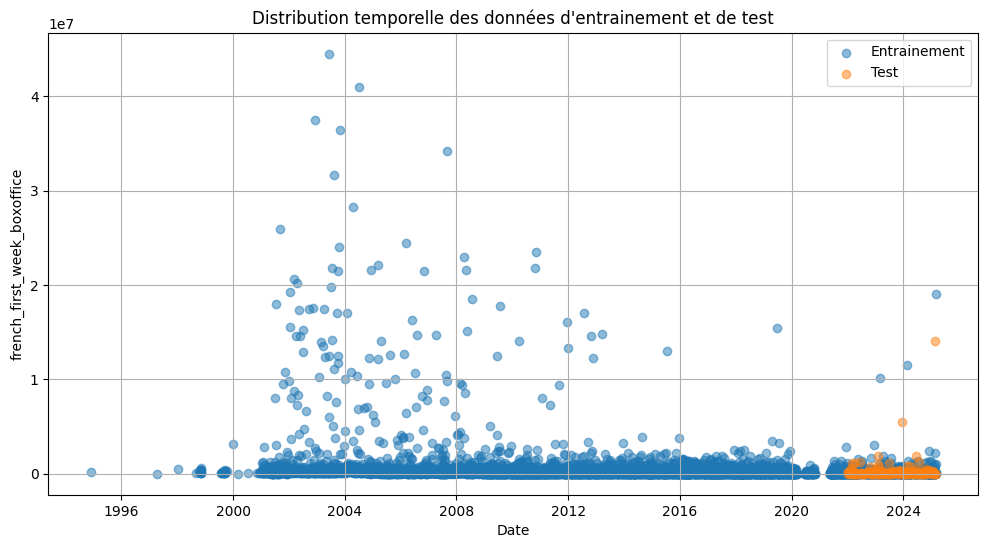

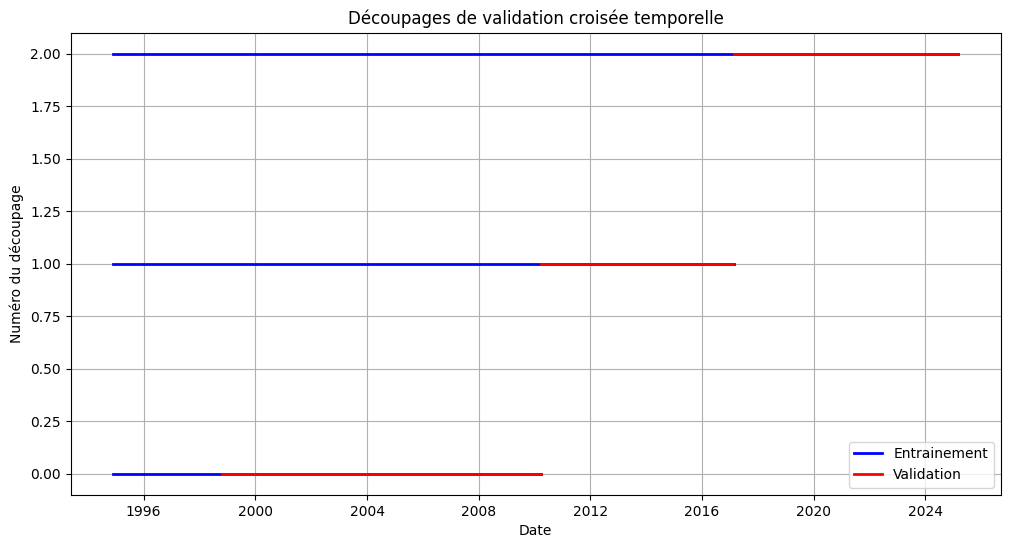

[I 2025-04-25 15:04:10,609] A new study created in memory with name: no-name-e53984bb-32a2-4107-909c-2bbd5fa524df



Performances du modèle par défaut sur le jeu de test:
MAE: 64866.89359844856
RMSE: 148945.96655138695
R²: 0.9800393633388715


[I 2025-04-25 15:04:12,244] Trial 0 finished with value: 412653.978142472 and parameters: {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.3, 'subsample': 1.0, 'colsample_bytree': 1.0, 'min_child_weight': 1, 'reg_alpha': 1e-08, 'reg_lambda': 1.0, 'gamma': 0.0, 'scale_pos_weight': 1.0}. Best is trial 0 with value: 412653.978142472.
[I 2025-04-25 15:04:15,154] Trial 1 finished with value: 412653.978142472 and parameters: {'n_estimators': 560, 'max_depth': 14, 'learning_rate': 0.3334660002466513, 'subsample': 0.9674639297552521, 'colsample_bytree': 0.729542637049654, 'min_child_weight': 2, 'reg_alpha': 6.195837802225187e-05, 'reg_lambda': 0.4154632989535585, 'gamma': 0.3775611984314059, 'scale_pos_weight': 0.9224809532977918}. Best is trial 0 with value: 412653.978142472.
[I 2025-04-25 15:04:22,393] Trial 2 finished with value: 412653.978142472 and parameters: {'n_estimators': 800, 'max_depth': 8, 'learning_rate': 0.039164327667861015, 'subsample': 0.8385380623808039, 'colsample_b

Meilleurs paramètres trouvés :
    n_estimators: 100
    max_depth: 6
    learning_rate: 0.3
    subsample: 1.0
    colsample_bytree: 1.0
    min_child_weight: 1
    reg_alpha: 1e-08
    reg_lambda: 1.0
    gamma: 0.0
    scale_pos_weight: 1.0

Performances du modèle optimisé sur le jeu de test:
MAE: 79634.04057801445
RMSE: 250550.67285748763
R²: 0.9435182632852468


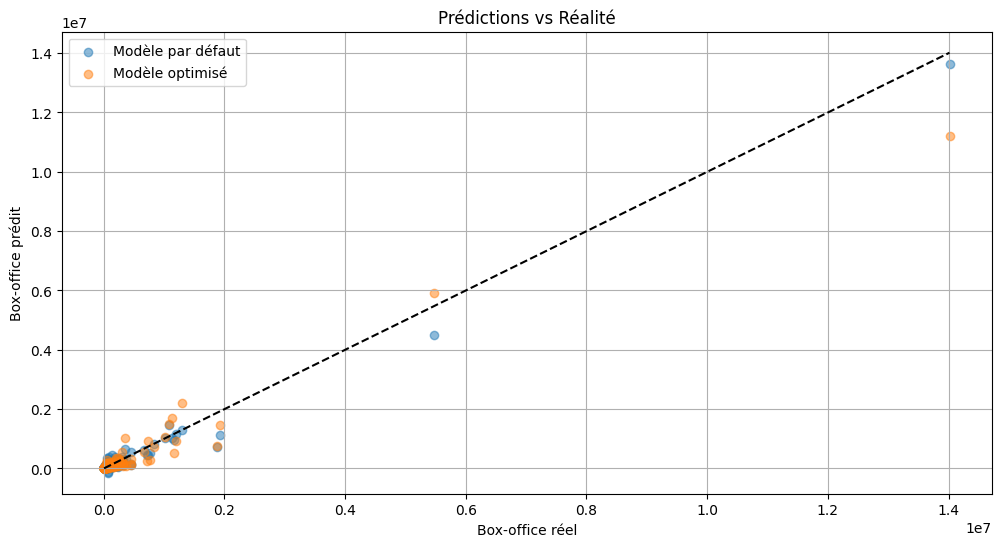

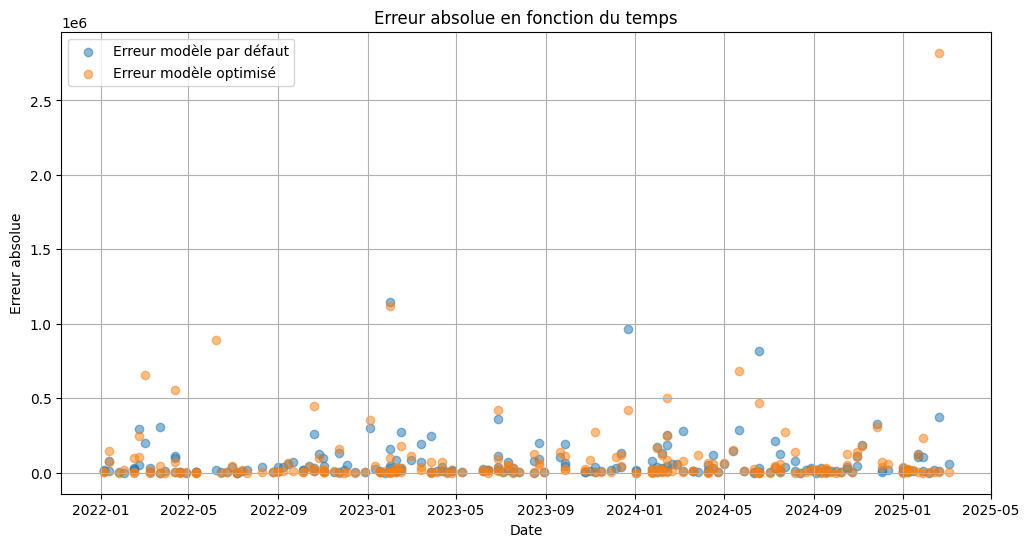

In [29]:
import warnings
warnings.filterwarnings('ignore')

best_model, default_model, study, train_indices, test_indices = optimize_xgboost_time_based(
    df=df, 
    X=X, y=y,
    target_column='french_first_week_boxoffice',
    numerical_features=numerical_features,
    date_feature=date_feature,
    categorical_features=categorical_features,
    list_categorical_features=list_categorical_features,
    test_years=test_years,    
    test_ratio=test_ratio,     
    n_cv_splits=3,     
    n_trials=3       
)

In [30]:
threshold = y_test.quantile(0.90)
best_idx = y_test[y_test >= threshold].index
X_test_best = X_test.loc[best_idx]
y_test_best = y_test.loc[best_idx]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test_best)
mae = mean_absolute_error(y_test_best, y_pred)
rmse = root_mean_squared_error(y_test_best, y_pred)
r2 = r2_score(y_test_best, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 500831.5891335227
RMSE: 760093.9100947777
R²: 0.931106342213177


MAE: 641102
RMSE: 1056736
R²: 0.8045

In [31]:
# plot_optimization_history(study)

100%|===================| 6857/6863 [00:13<00:00]        

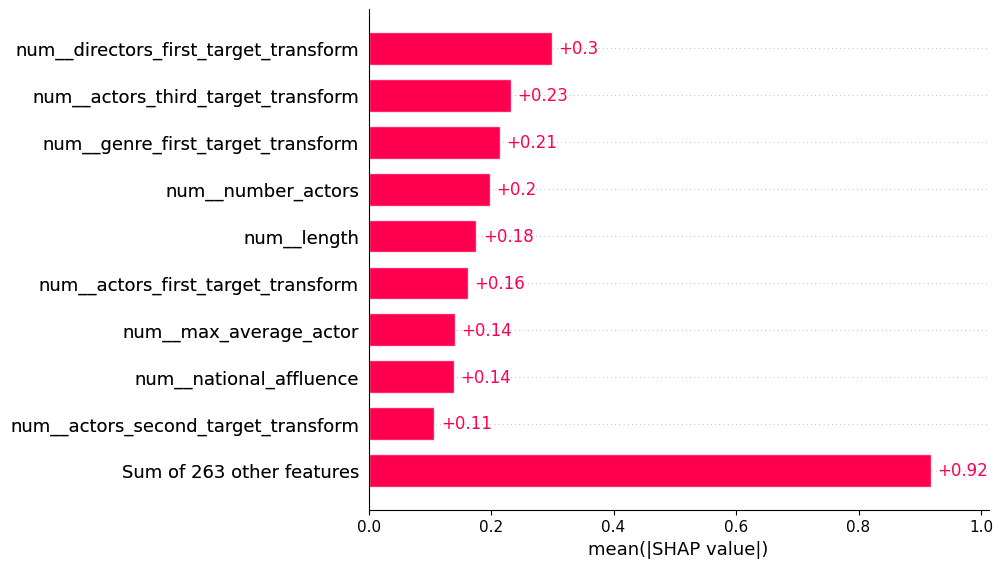

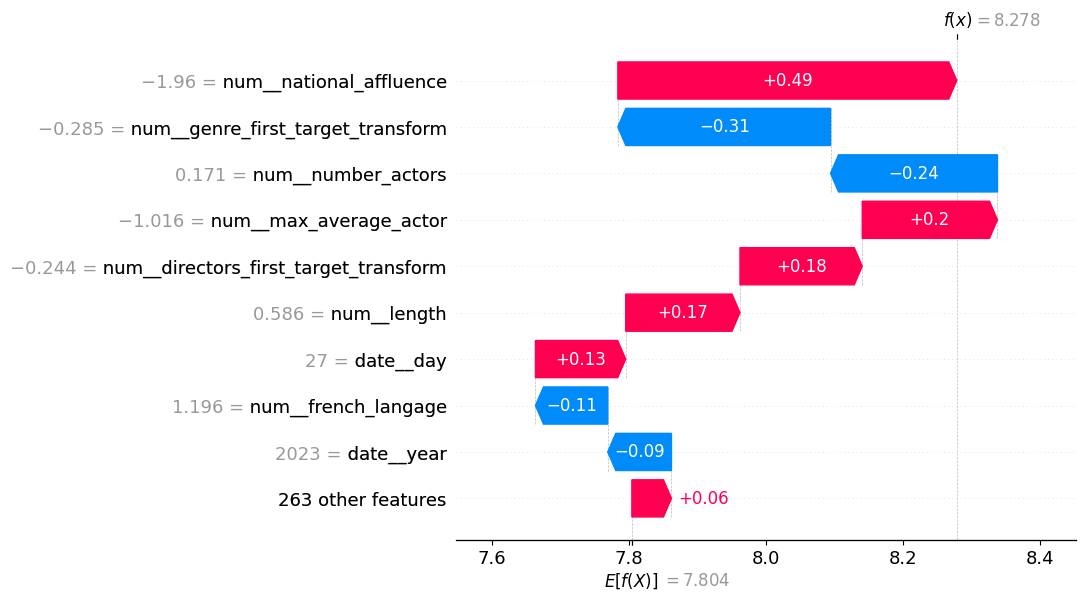

In [32]:
import shap
import matplotlib.pyplot as plt

# Étape 1 : extraire le preprocessor et le modèle
preprocessor = best_model.named_steps['preprocessor']
xgb_model = best_model.named_steps['xgboost'].regressor_

# Étape 2 : transformer X avec le preprocessor
X_transformed = preprocessor.transform(X).toarray()
feature_names = preprocessor.get_feature_names_out()
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)


# Étape 3 : créer l'explainer et calculer les SHAP values
explainer = shap.Explainer(xgb_model, X_transformed_df)
shap_values = explainer(X_transformed_df)

# Étape 4 : visualisation
shap.plots.bar(shap_values)         # importance globale
shap.plots.waterfall(shap_values[0])  # explication locale (ex : ligne 0)


# test avec json d'entrée d'api

In [1]:
import json

with open('json_test1.json', 'r', encoding='utf-8') as f:
    data_test_04_30 = json.load(f)

In [2]:
import json

with open('json_test2.json', 'r', encoding='utf-8') as f:
    data_test_03_05 = json.load(f)

In [5]:
from datetime import datetime
import pandas as pd
import numpy as np


def get_national_affluence(date):
    """
    Récupère la valeur national_affluence basée sur la date.
    
    Args:
        date: Datetime
        
    Returns:
        Valeur national_affluence
    """
    # Charger les données d'affluence
    df_affluence = pd.read_parquet("affluence_docker.parquet")
    
    # Convertir la date en objet datetime correspondant à la data
    date = pd.to_datetime(f"{date.year}-{date.month:02d}-01")
    
    # Retourner la valeur d'affluence pour la date du mois correspondant
    return df_affluence.loc[date, 'box_office'] if date in df_affluence.index else None

def get_max_average_actor(actors):
    df_actors = pd.read_parquet("actors_docker.parquet")

    # Prétraitement des noms d'acteurs de la requête
    processed_actors = [
        actor.replace(" ", "").replace("-", "").replace("_", "").strip().lower()
        for actor in actors
    ]

    scores = []
    for actor in processed_actors:
        if actor in df_actors.index :
            scores.append(df_actors.loc[actor, "boxoffice_average"])
    scores.sort(reverse=True)
    return scores

def get_target_encoding(genre, langage, nationality, directors, actors):
    with open('target_encoding_list.json', 'r', encoding='utf-8') as f:
        target_encoding_dict = json.load(f)
    str_list = ["genre", "langage", "nationality", 'directors', "actors"]
    result = {}
    for i, col_list in enumerate([genre, langage, nationality, directors, actors]):
        col_key = str_list[i]
        scores = []
        for item in col_list:
            if item in target_encoding_dict.get(col_key, {}):
                scores.append(target_encoding_dict[col_key][item])
        scores = sorted(scores, reverse=True)
        result[f'{col_key}_first_target_transform'] = scores[0] if len(scores) > 0 else 0
        result[f'{col_key}_second_target_transform'] = scores[1] if len(scores) > 1 else 0
        result[f'{col_key}_third_target_transform'] = scores[2] if len(scores) > 2 else 0

    return result

def num_list_col(x):
    n = len(x)
    if n==1:
        if x[0]=="no value":
            n=0
    return n

def transform_input(films):
    """
    Transforme les données d'entrée au format attendu par le modèle.
    
    Args:
        film_input: Données du film au format d'entrée de l'API
        
    Returns:
        DataFrame contenant les données formatées pour le modèle
    """
    data = []
    for film_input in films:
        # Initialisation des variables
        french_prod = 1 if "France" in film_input["nationality"] else 0
        usa_prod = 1 if "U.S.A." in film_input["nationality"] or "U.S.A" in film_input["nationality"] else 0
        japan_prod = 1 if "Japon" in film_input["nationality"] else 0
        uk_prod = 1 if "Grande-Bretagne" in film_input["nationality"] or 'UK' in film_input["nationality"] or 'United Kingdom' in film_input["nationality"] else 0
        italy_prod = 1 if 'Italie' in film_input["nationality"] or 'Italy' in film_input["nationality"] else 0
        spain_prod = 1 if 'Espagne' in film_input["nationality"] or 'Spain' in film_input["nationality"] else 0
        germany_prod = 1 if 'Allemagne' in film_input["nationality"] or 'Germany' in film_input["nationality"] else 0
        nationality_count = num_list_col(film_input["nationality"])
        
        # Langues
        french_langage = 1 if any(lang.lower() in ["francais", "français", "french"] for lang in film_input["langage"]) else 0
        english_langage = 1 if any(lang.lower() in ["anglais", "english"] for lang in film_input["langage"]) else 0
        language_count = num_list_col(film_input["langage"])
        
        # Nombre d'acteurs
        number_actors = num_list_col(film_input["actors"])
        
        # Récupération des données externes via Azure ML
        # Date formatée pour la fonction
        date_str = film_input["date"]
        # Récupération de l'affluence nationale basée sur la date
        national_affluence = get_national_affluence(pd.to_datetime(date_str))
        
        # Récupération de la popularité maximale moyenne des acteurs à partir de jpbox
        list_average_actor = get_max_average_actor(film_input["actors"])
        max_average_actor = list_average_actor[0] if len(list_average_actor)>0 else 0
        second_max_average_actor = list_average_actor[1] if len(list_average_actor)>1 else 0
        third_max_average_actor = list_average_actor[2] if len(list_average_actor)>2 else 0

        # Target encoding des listes
        dict_target_encoding = get_target_encoding(film_input["genre"], film_input["langage"], film_input["nationality"], film_input["directors"], film_input["actors"])
        for col in ["genre", "langage", "nationality", "directors", "actors"]:
            dict_target_encoding
        
        # Création du DataFrame au format attendu par le modèle
        data.append([
            french_prod, 
            pd.to_datetime(date_str),
            film_input["editor"],
            film_input["length"],
            number_actors,
            usa_prod,
            japan_prod,
            national_affluence,
            french_langage,
            english_langage,
            max_average_actor,
            second_max_average_actor,
            third_max_average_actor,
            nationality_count,
            germany_prod,
            spain_prod,
            italy_prod,
            uk_prod,
            language_count,
            dict_target_encoding["genre_first_target_transform"], 
            dict_target_encoding["genre_second_target_transform"],
            dict_target_encoding["genre_third_target_transform"],
            dict_target_encoding["langage_first_target_transform"], 
            dict_target_encoding["langage_second_target_transform"],
            dict_target_encoding["langage_third_target_transform"], 
            dict_target_encoding["nationality_first_target_transform"],
            dict_target_encoding["nationality_second_target_transform"],
            dict_target_encoding["nationality_third_target_transform"],
            dict_target_encoding["directors_first_target_transform"],
            dict_target_encoding["directors_second_target_transform"],
            dict_target_encoding["directors_third_target_transform"],
            dict_target_encoding["actors_first_target_transform"], 
            dict_target_encoding["actors_second_target_transform"],
            dict_target_encoding["actors_third_target_transform"]
        ])

    columns = [
        'french_prod',
        'date',
        'editor',
        'length',
        'number_actors',
        'usa_prod',
        'japan_prod',
        'national_affluence',
        'french_langage', 
        'english_langage',
        'max_average_actor',
        'second_max_average_actor',
        'third_max_average_actor',  
        'nationality_count', 
        'germany_prod', 
        'spain_prod', 
        'italy_prod', 
        'uk_prod', 
        'language_count', 
        'genre_first_target_transform', 
        'genre_second_target_transform',
        'genre_third_target_transform',
        'langage_first_target_transform', 
        'langage_second_target_transform',
        'langage_third_target_transform', 
        'nationality_first_target_transform',
        'nationality_second_target_transform',
        'nationality_third_target_transform',
        'directors_first_target_transform',
        'directors_second_target_transform',
        'directors_third_target_transform',
        'actors_first_target_transform', 
        'actors_second_target_transform',
        'actors_third_target_transform'
    ]
    
    df = pd.DataFrame(data=data, columns=columns)
    
    return df

In [6]:
test_03_05 = transform_input(data_test_03_05)

In [7]:
test_04_30 = transform_input(data_test_04_30)

In [40]:
xgboost_model.fit(X_train, y_train)
model_file = "best_model.pkl"
with open(model_file, "wb") as f:
    cloudpickle.dump(xgboost_model, f)

In [12]:
import cloudpickle
best_model = cloudpickle.load(open('best_model.pkl','rb'))
best_model2 = cloudpickle.load(open('best_model_tuned.pkl','rb'))

In [13]:
# _ = xgboost_model.predict(test_03_05)
# for i,film in enumerate(data_test_03_05):
#     print(f"{film["title"]} : pred : {_[i]}")

In [15]:
_ = best_model.predict(test_04_30)
for i,film in enumerate(data_test_04_30):
    print(f"{film["title"]} : pred : {_[i]}")


Les Fleurs du silence : pred : 88811.6796875
Tourist Family : pred : 21248.955078125
Little Jaffna : pred : 14200.595703125
Les Linceuls : pred : 191595.6875
Retro : pred : 6511.09765625
Un pays en flammes : pred : 11639.033203125
Dheena : pred : 25113.365234375
Les Esprits Libres : pred : 12568.21875
Une pointe d'amour : pred : 23771.318359375
L’Arbre de l’Authenticité : pred : 12568.21875
Thunderbolts* : pred : 331705.625
La Peur au ventre : pred : 11639.033203125
Les Indomptés : pred : 164136.21875
Tu ne mentiras point : pred : 211809.15625


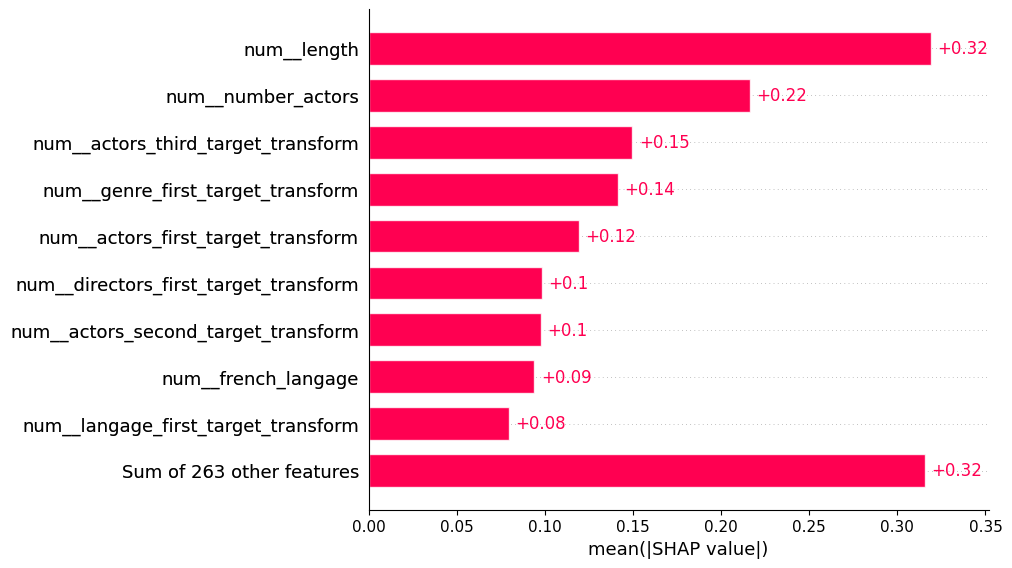

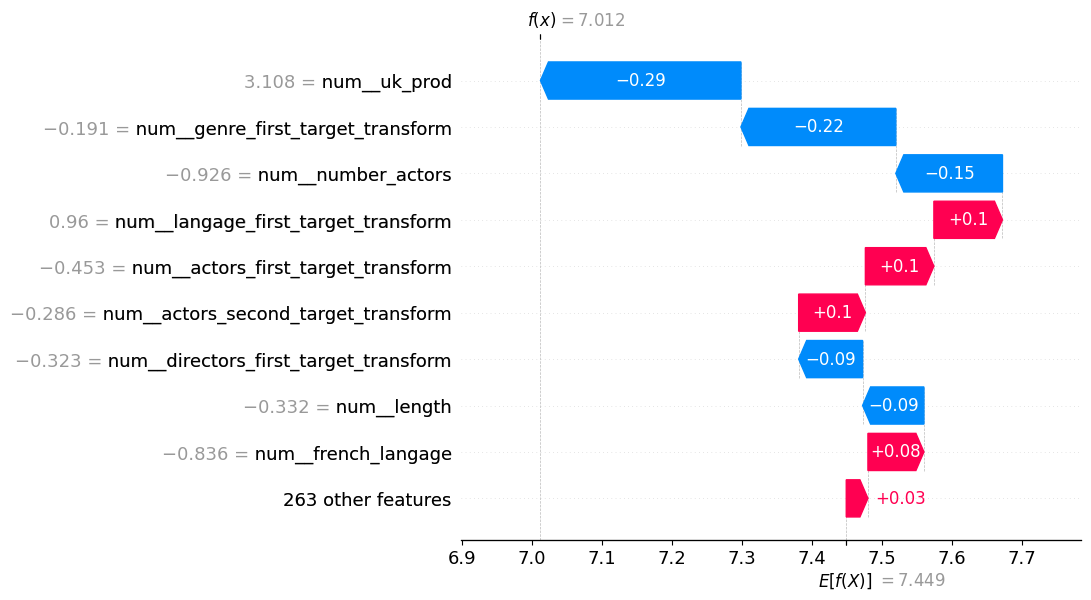

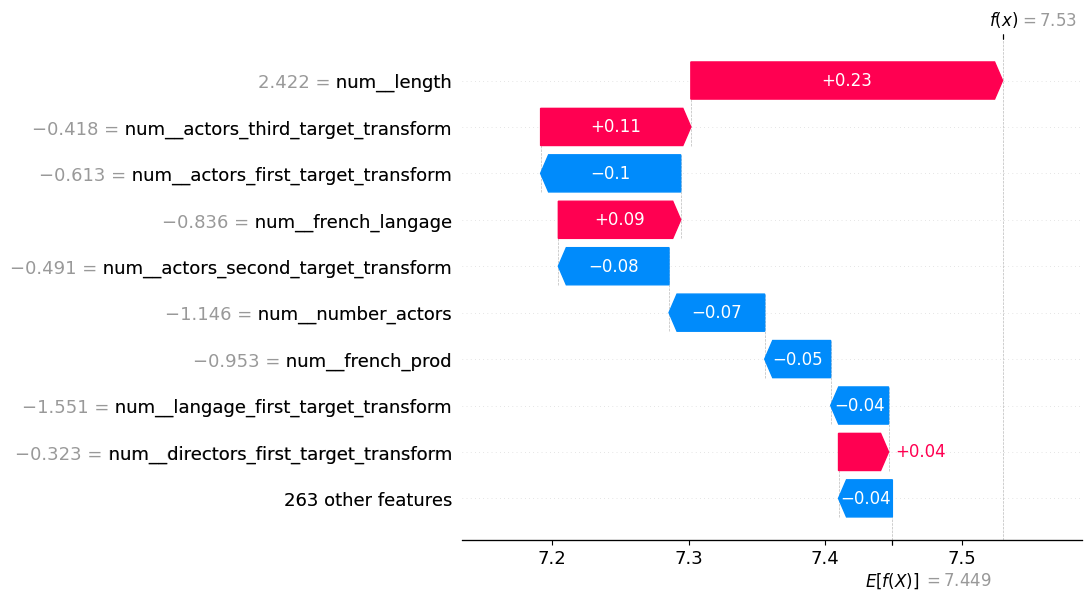

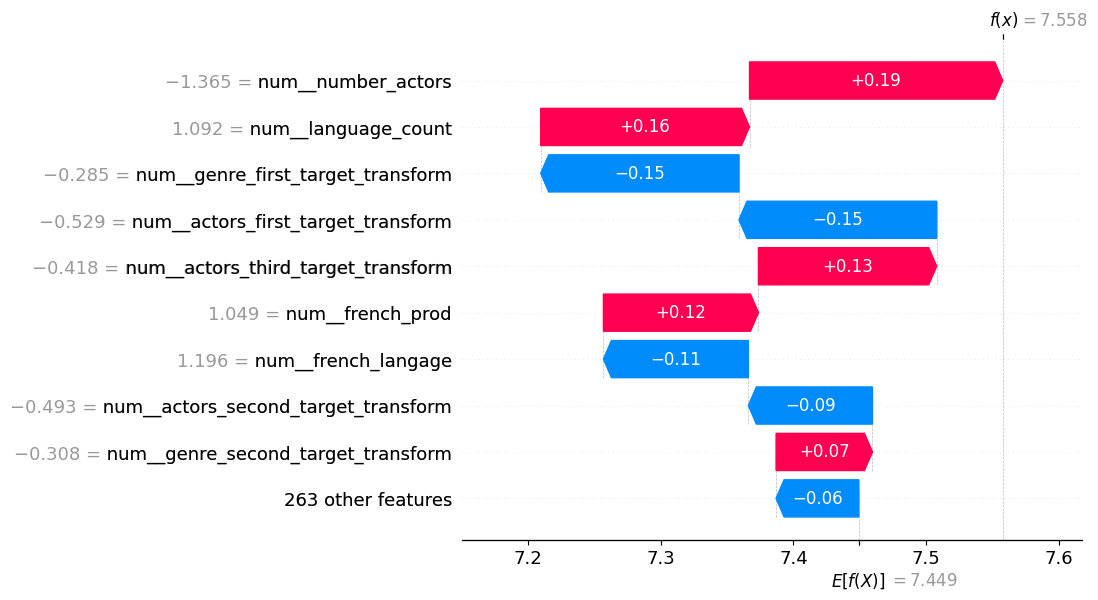

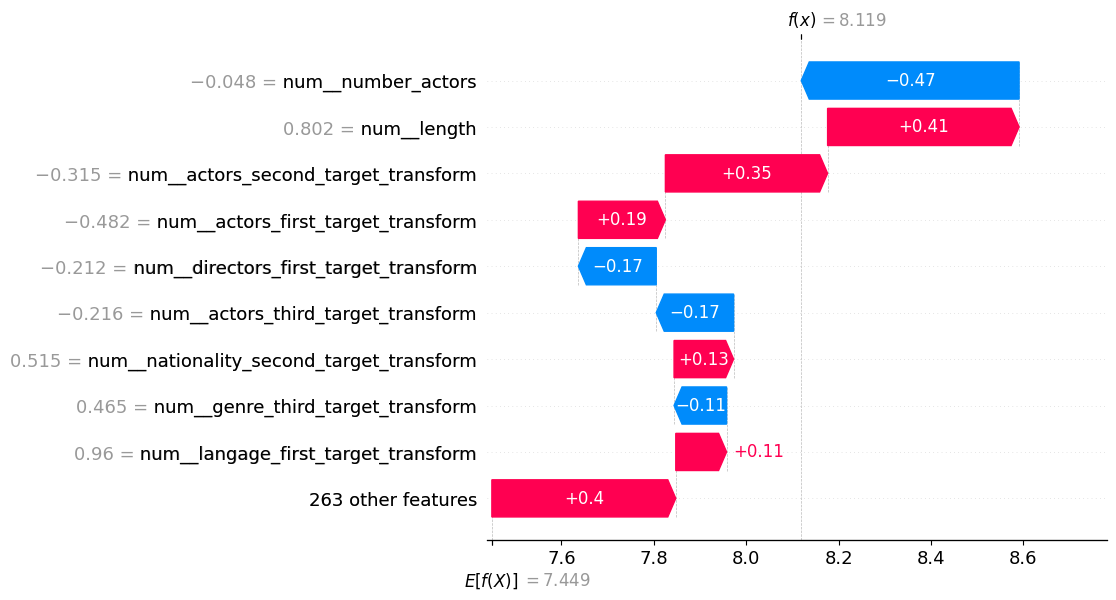

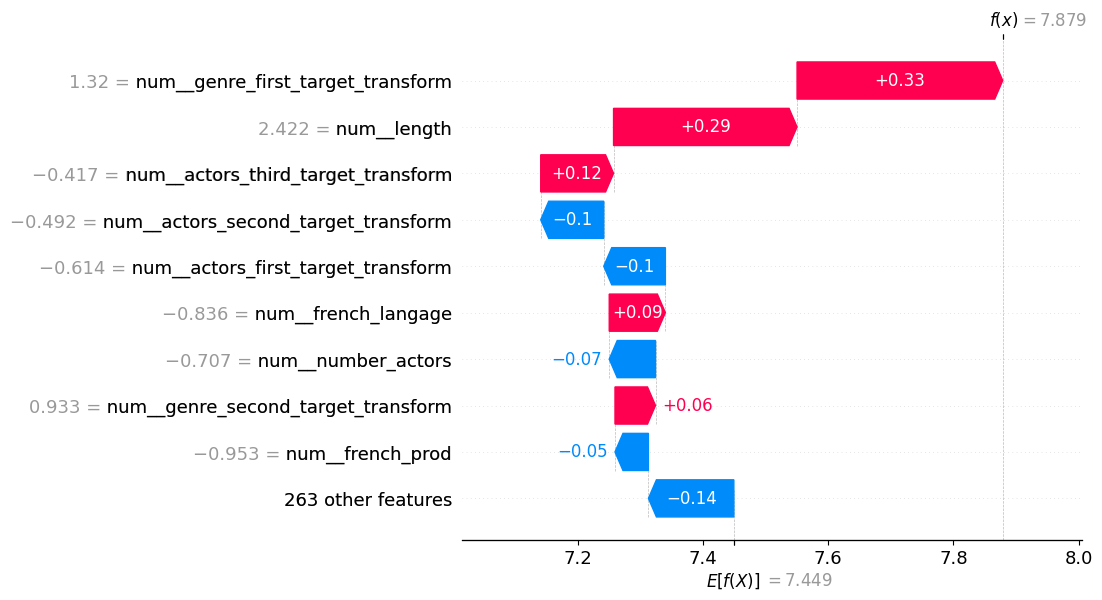

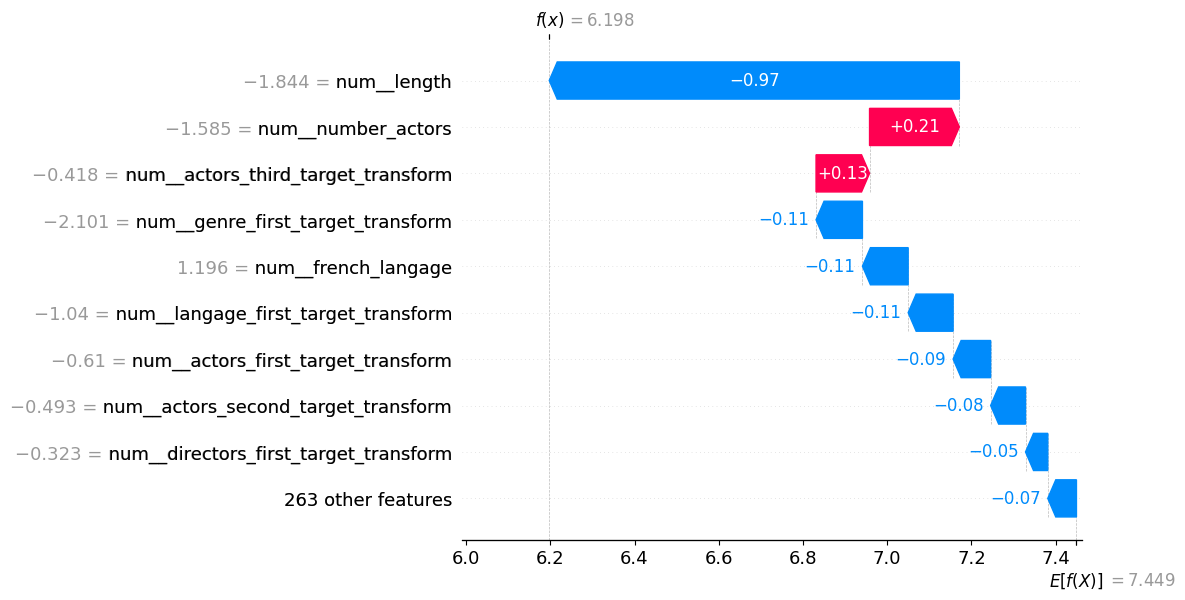

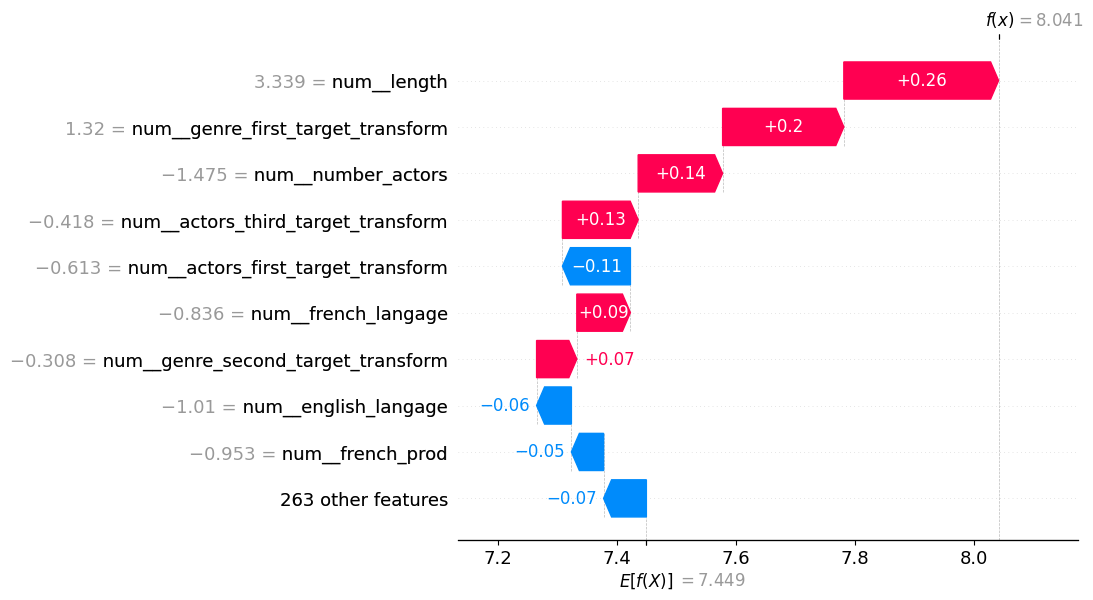

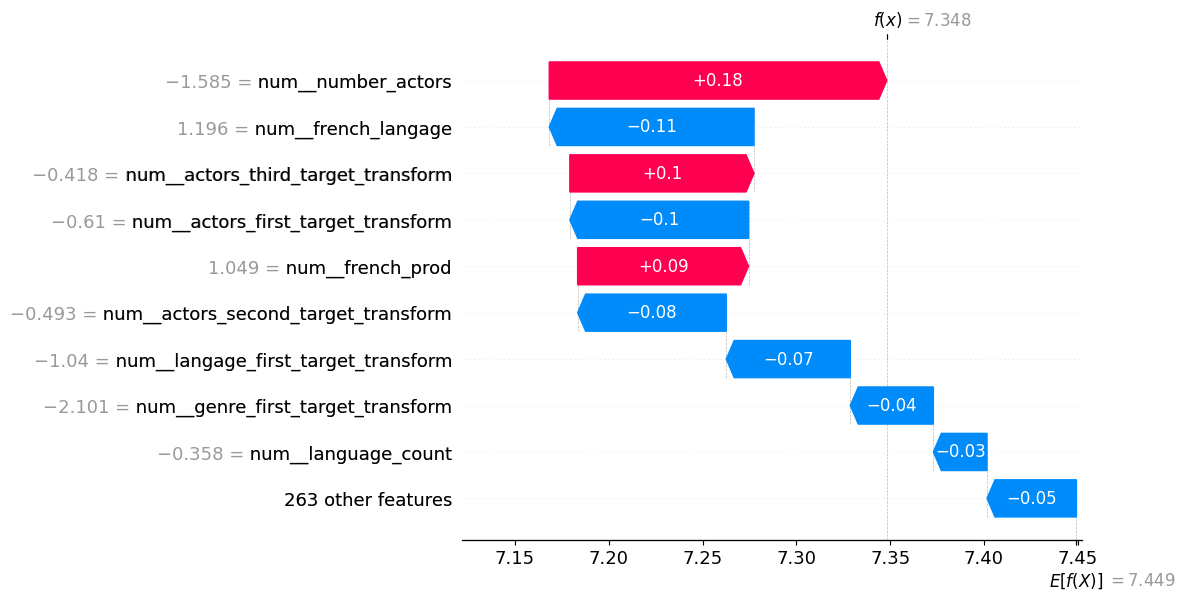

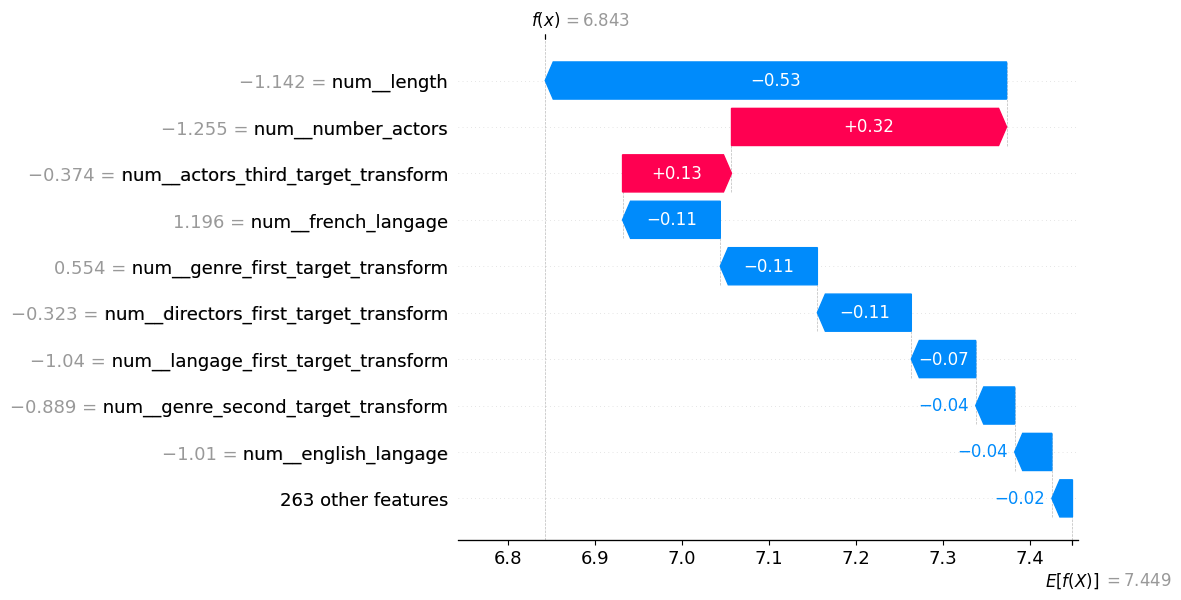

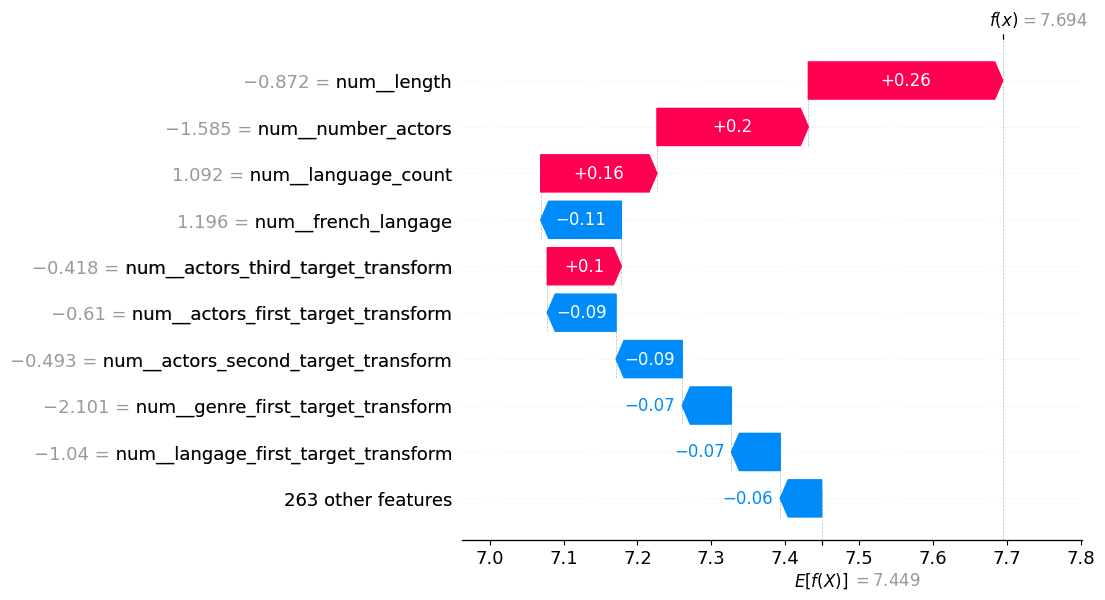

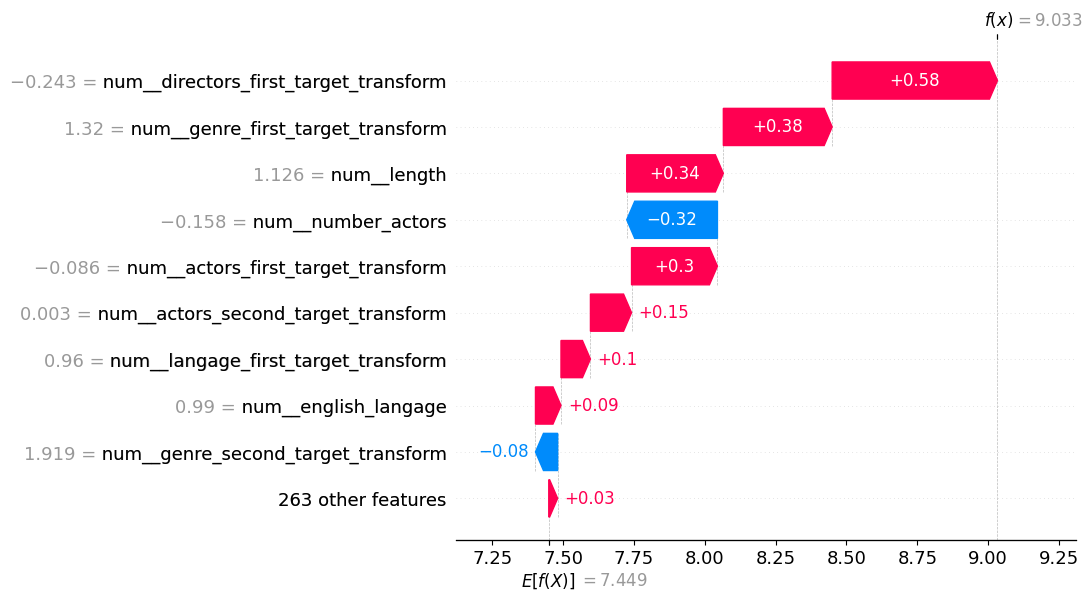

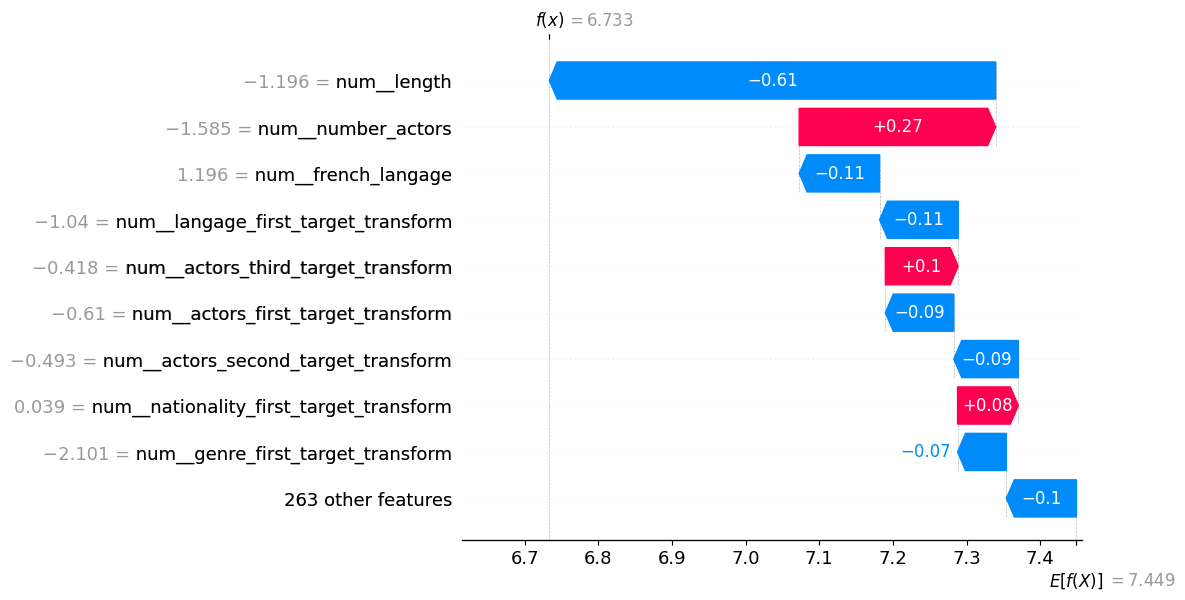

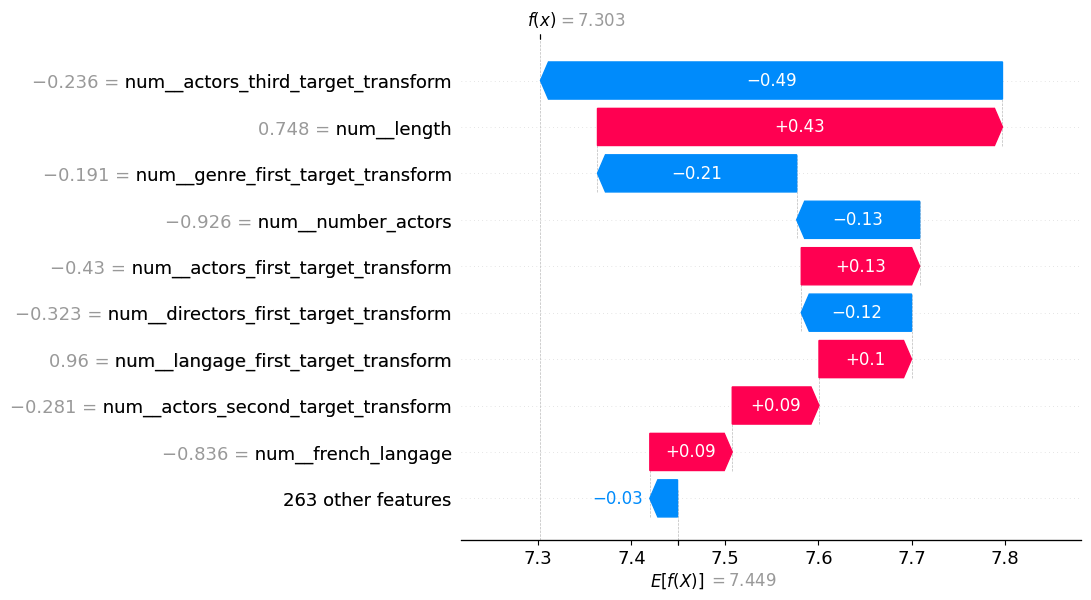

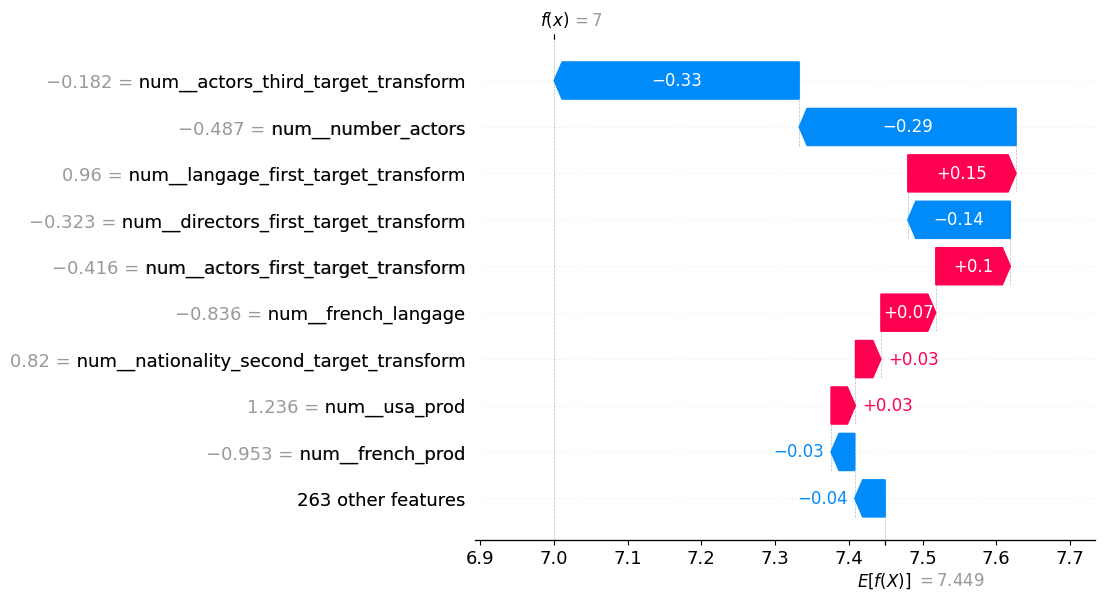

In [24]:
import shap
import matplotlib.pyplot as plt

# Étape 1 : extraire le preprocessor et le modèle
preprocessor = best_model2.named_steps['preprocessor']
xgb_model = best_model2.named_steps['xgboost'].regressor_

# Étape 2 : transformer X avec le preprocessor
X_transformed = preprocessor.transform(test_04_30).toarray()
feature_names = preprocessor.get_feature_names_out()
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)


# Étape 3 : créer l'explainer et calculer les SHAP values
explainer = shap.Explainer(xgb_model, X_transformed_df)
shap_values = explainer(X_transformed_df)

# Étape 4 : visualisation
shap.plots.bar(shap_values)         # importance globale
for i, item in enumerate(shap_values):
    shap.plots.waterfall(shap_values[i])  # explication locale (ex : ligne 0)

In [41]:
best_model.fit(X_train, y_train)
model_file = "best_model_tuned.pkl"
with open(model_file, "wb") as f:
    cloudpickle.dump(best_model, f)

In [42]:
test_04_30.dtypes

french_prod                                     int64
date                                   datetime64[ns]
editor                                         object
length                                          int64
number_actors                                   int64
usa_prod                                        int64
japan_prod                                      int64
national_affluence                            float64
french_langage                                  int64
english_langage                                 int64
max_average_actor                               int64
second_max_average_actor                        int64
third_max_average_actor                         int64
nationality_count                               int64
germany_prod                                    int64
spain_prod                                      int64
italy_prod                                      int64
uk_prod                                         int64
language_count              

In [ ]:
best_model.fit(X_train,y_train)
best_model.predict(X_test)

array([ 1.69121797e+04,  6.52475664e+04,  6.34647734e+04,  2.01546406e+05,
        6.39967656e+04,  8.10289141e+04,  1.29326152e+04,  6.14288945e+04,
        1.18192219e+05,  2.50296230e+04,  1.62976375e+05,  1.97312461e+04,
        1.30050258e+05,  1.56363535e+04,  1.02896977e+05,  9.65193281e+04,
        2.98128188e+05,  6.06014375e+04,  1.93285762e+04,  1.42050566e+04,
        2.97837719e+05,  1.36176992e+04,  1.74409668e+04,  6.49675781e+04,
        2.53858164e+04,  3.06254258e+04,  2.89948469e+05,  1.26544219e+04,
        1.45057762e+06,  1.39833188e+05,  2.32964980e+04,  1.37664297e+04,
        4.27612852e+04,  6.73121016e+04,  1.09594695e+05,  4.78666758e+04,
        3.31813047e+04,  1.90955684e+04,  2.03974785e+04,  3.34303398e+04,
        1.15065898e+05,  7.73561406e+04,  1.03621531e+06,  8.05423906e+04,
        3.30864031e+05,  1.52658877e+04,  2.39174658e+03,  1.58572766e+05,
        6.28659883e+04,  2.18656062e+05,  1.60447617e+04,  4.32777490e+03,
        2.84551719e+04,  